In [ ]:
# Install latex for the plots
! sudo apt-get update
! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8

Password:

In [4]:
# Google Drive stuff for colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd  /content/drive/My\ Drive/Year\ 4\:\ Synthesis/NS162\:\ Statistical\ Mechanics/Renormalization\ Research\ Project/renormalization/supervised_convnet/t_2.269/3x3/

Mounted at /content/drive
/content/drive/My Drive/Year 4: Synthesis/NS162: Statistical Mechanics/Renormalization Research Project/renormalization/supervised_convnet/t_2.269/3x3


In [6]:
# import stuff
import matplotlib.pyplot as plt
# import train, frozen
import sys
sys.path.insert(0, "/Library/TeX/texbin/latex")
import supervised_convnet
import pickle
from collections import defaultdict
import numpy as np
from matplotlib import rc
rc('font',**{'size': 25})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# Histogram of unfrozen vs. frozen

In [7]:
import sys; sys.path

['/Library/TeX/texbin/latex',
 '/Library/TeX/texbin/',
 '../../',
 '../../',
 '/Users/qanguyen/Google Drive/Year 4: Synthesis/NS162: Statistical Mechanics/Renormalization Research Project/renormalization/supervised_convnet/t_2.269/x3x3',
 '/Users/qanguyen/anaconda3/envs/renormalization/lib/python37.zip',
 '/Users/qanguyen/anaconda3/envs/renormalization/lib/python3.7',
 '/Users/qanguyen/anaconda3/envs/renormalization/lib/python3.7/lib-dynload',
 '',
 '/Users/qanguyen/anaconda3/envs/renormalization/lib/python3.7/site-packages',
 '/Users/qanguyen/anaconda3/envs/renormalization/lib/python3.7/site-packages/IPython/extensions',
 '/Users/qanguyen/.ipython']

In [11]:
sys.path

['/Library/TeX/texbin/latex',
 '/Library/TeX/texbin/',
 '../../',
 '../../',
 '/Users/qanguyen/Google Drive/Year 4: Synthesis/NS162: Statistical Mechanics/Renormalization Research Project/renormalization/supervised_convnet/t_2.269/x3x3',
 '/Users/qanguyen/anaconda3/envs/renormalization/lib/python37.zip',
 '/Users/qanguyen/anaconda3/envs/renormalization/lib/python3.7',
 '/Users/qanguyen/anaconda3/envs/renormalization/lib/python3.7/lib-dynload',
 '',
 '/Users/qanguyen/anaconda3/envs/renormalization/lib/python3.7/site-packages',
 '/Users/qanguyen/anaconda3/envs/renormalization/lib/python3.7/site-packages/IPython/extensions',
 '/Users/qanguyen/.ipython']

In [20]:
import subprocess
!export PATH=$PATH:/Library/TeX/texbin/latex
%load_ext autoreload
%autoreload 2
!printenv

TERM_PROGRAM=Apple_Terminal
SHELL=/bin/bash
TERM=xterm-color
KMP_DUPLICATE_LIB_OK=True
CLICOLOR=1
TMPDIR=/var/folders/r5/3z6vpgxn7xnfs25z7mqmrlvw0000gp/T/
Apple_PubSub_Socket_Render=/private/tmp/com.apple.launchd.uLtA1sPeJw/Render
CONDA_SHLVL=1
TERM_PROGRAM_VERSION=421.2
CONDA_PROMPT_MODIFIER=(base) 
TERM_SESSION_ID=F49E4058-47EB-4174-8418-D03BB831190D
USER=qanguyen
CONDA_EXE=/Users/qanguyen/anaconda3/bin/conda
SSH_AUTH_SOCK=/private/tmp/com.apple.launchd.l3Lvcumdpi/Listeners
__CF_USER_TEXT_ENCODING=0x1F6:0x0:0x0
KERNEL_LAUNCH_TIMEOUT=40
JPY_PARENT_PID=63613
PAGER=cat
_CE_CONDA=
PATH=/Users/qanguyen/anaconda3/bin:/Users/qanguyen/anaconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/go/bin:/usr/bin:/usr/bin
_=/usr/bin/printenv
CONDA_PREFIX=/Users/qanguyen/anaconda3
PWD=/Users/qanguyen/Google Drive/Year 4: Synthesis/NS162: Statistical Mechanics/Renormalization Research Project/renormalization/supervised_convnet/t_2.269/x3x3
MPLBACKEND=module://ipykernel.pylab.backend

mean 0.9177029999999999
500
std 0.000216348288645878
mean 0.9241910229645094
479
std 0.00038198187513475214


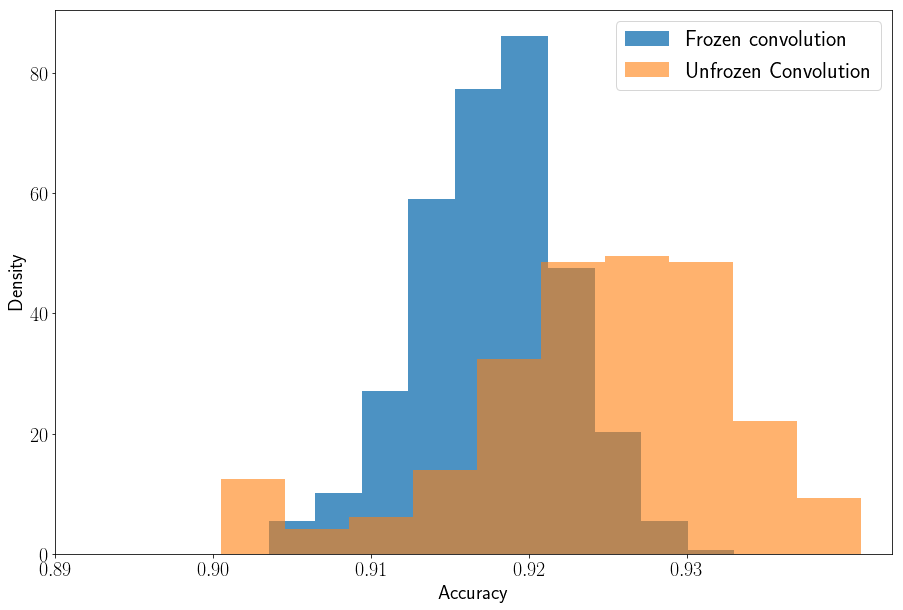

In [9]:
import os 
os.environ["PATH"] += os.pathsep + '/usr/bin' + os.pathsep + '/Library/TeX/texbin/'
# import subprocess
# subprocess.check_call(["latex"])

prefix = ""
filenames = ["frozen_convolution_pretrained_relu.pl", "frozen_convolution_no_center_relu.pl",
        "unfrozen_convolution_relu.pl"]#, "frozen_convolution_with_center_relu.pl"]
labels = [ "Frozen convolution",
"Unfrozen Convolution", "Frozen convolution, pretrained","frozen convolution with center relu"]
alphas = [0.8, 0.6, 0.4, 0.2]
plt.figure(figsize=(15,10))
plt.xlabel("Accuracy", fontsize = 20)
plt.ylabel("Density", fontsize = 20)
for index, filename in enumerate(filenames[1:3]):
    with open(prefix + filename, "rb") as handle:
        results = pickle.load(handle)
    if index <= 2:
        b = np.array(results["best_val_acc_hist"])
        b = (b[b > 0.9])
        plt.hist(b, alpha = alphas[index], label = labels[index], density=True)
        plt.xticks(np.arange(0.89, 0.94, 0.01), fontsize = 20)
        plt.yticks(np.arange(0, 100, 20), fontsize = 20)
        print("mean", np.mean(b))
        print(len(b))
        print("std", np.std(b)/np.sqrt(len(b)))
    else:
        plt.hist(results, alpha = alphas[index], label = labels[index], normed=True)
    # print("filename", filename)
    # print("mean", np.mean(results))
    # print("std", np.std(results))
plt.legend()
plt.show()

Not approve this project because the prisoners are merely a population of convenience for the student.

Not an excessive incentive.


Is wrong because 46.104 states that research conducted in prisons is not exempt if the subject population is only prisoners.
Wrong and is prohibited; subject selection needs to be free from intervention by prison authorities or prisoners.

Both subparts apply, as these individuals are under the legal age of consent and are incarcerated


mean 0.9080020080321285
498
std 0.0004552745046303493
mean 0.859251
500
std 0.0021493968916884566
mean 0.868135
500
std 0.0013103314656986603


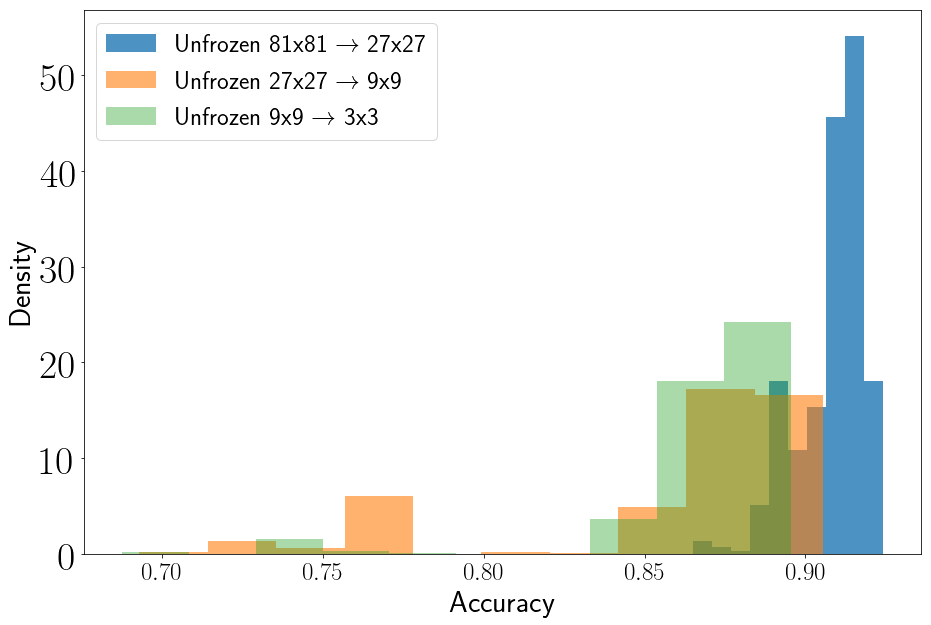

In [53]:
import os 
os.environ["PATH"] += os.pathsep + '/usr/bin' + os.pathsep + '/Library/TeX/texbin/'
# import subprocess
# subprocess.check_call(["latex"])

prefix = ""
filenames = ["unfrozen_convolution_relu.pl","../layer_by_layer/unfrozen_convolution_relu.pl", "../layer_by_layer/unfrozen_convolution_relu9x9.pl",
        ]#, "frozen_convolution_with_center_relu.pl"]
labels = [ r"Unfrozen 81x81 $\rightarrow$ 27x27",
r"Unfrozen 27x27 $\rightarrow$ 9x9", r"Unfrozen 9x9 $\rightarrow$ 3x3"]
alphas = [0.8, 0.6, 0.4, 0.2]
plt.figure(figsize=(15,10))
plt.xlabel("Accuracy", fontsize = 30)
plt.ylabel("Density", fontsize = 30)
for index, filename in enumerate(filenames):
    with open(prefix + filename, "rb") as handle:
        results = pickle.load(handle)
    if index <= 3:
        b = np.array(results["best_val_acc_hist"])
        b = (b[b > 0.6])
        plt.hist(b, alpha = alphas[index], label = labels[index], density=True)
#         plt.xticks(np.arange(0.87, 0.92, 0.01), fontsize = 40)
        plt.yticks(np.arange(0, 60, 10), fontsize = 40)
        print("mean", np.mean(b))
        print(len(b))
        print("std", np.std(b)/np.sqrt(len(b)))
    else:
        plt.hist(results, alpha = alphas[index], label = labels[index], normed=True)
    # print("filename", filename)
    # print("mean", np.mean(results))
    # print("std", np.std(results))
plt.legend()
plt.show()

# Histogram for 1 channel vs. many channels

mean 0.9241910229645094
479
std 0.00038198187513475214
mean 0.920560291060291
481
std 0.00036858632232196215
mean 0.9270181818181819
495
std 0.0003314999249461571


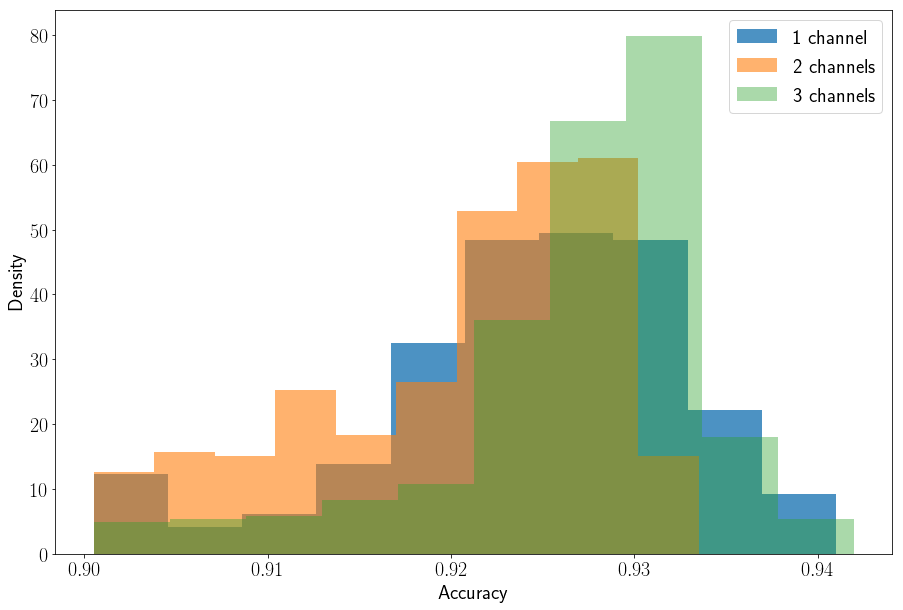

In [101]:
prefix = ""
filenames = ["unfrozen_convolution_relu.pl", "unfrozen_convolution_2_channels.pl", "unfrozen_convolution_3_channels.pl",
        ]#, "frozen_convolution_with_center_relu.pl"]
labels = ["1 channel","2 channels", "3 channels", "frozen convolution with center relu"]
alphas = [0.8, 0.6, 0.4, 0.2]
plt.figure(figsize=(15,10))
plt.xlabel("Accuracy")
plt.ylabel("Density")
for index, filename in enumerate(filenames[:3]):
    with open(prefix + filename, "rb") as handle:
        results = pickle.load(handle)
    if index <= 2:
        b = np.array(results["best_val_acc_hist"])
        b = (b[b > 0.9])
        plt.hist(b, 10, alpha = alphas[index], label = labels[index], density=True)
        print("mean", np.mean(b))
        print(len(b))
        print("std", np.std(b)/np.sqrt(len(b)))
    else:
        plt.hist(results, alpha = alphas[index], label = labels[index], normed=True)
    # print("filename", filename)
    # print("mean", np.mean(results))
    # print("std", np.std(results))
plt.legend()

# Histogram for multilayer training

Text(0, 0.5, 'Density')

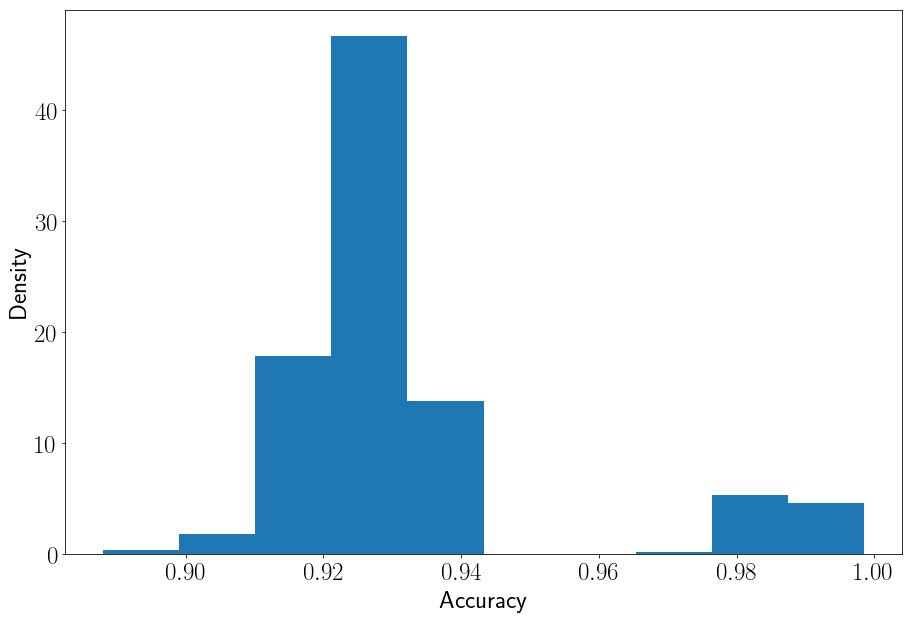

In [11]:
with open("../81x81/multilayer_1channel.pl", "rb") as handle:
    results = pickle.load(handle)
# w = results["conv_params"]
b = np.array(results["best_val_acc_hist"])
b = (b[b > 0.6])
plt.figure(figsize=(15,10))

plt.hist(b, 10, density=True)
plt.xlabel("Accuracy")
plt.ylabel("Density")


# Weights histogram

542
axs (3, 3)
(array([ 2.,  3.,  9., 21., 29., 42., 53., 45., 73., 45., 34., 33., 33.,
       33., 33., 12., 14.,  9.,  1.,  7.,  3.,  3.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]), array([0.6377122 , 0.67085266, 0.7039931 , 0.7371335 , 0.770274  ,
       0.80341446, 0.8365549 , 0.8696953 , 0.9028358 , 0.93597627,
       0.9691167 , 1.0022571 , 1.0353975 , 1.0685381 , 1.1016785 ,
       1.1348189 , 1.1679595 , 1.2010999 , 1.2342403 , 1.2673807 ,
       1.3005211 , 1.3336617 , 1.3668021 , 1.3999425 , 1.433083  ,
       1.4662235 , 1.4993639 , 1.5325043 , 1.5656447 , 1.5987853 ,
       1.6319257 , 1.6650661 , 1.6982067 , 1.7313471 , 1.7644875 ,
       1.7976279 , 1.8307683 , 1.8639089 , 1.8970493 , 1.9301897 ,
       1.9633303 , 1.9964707 , 2.029611  , 2.0627515 , 2.095892  ,
       2.1290324 , 2.1621728 , 2.1953135 , 2.2284539 , 2.2615943 ,
       2.2947347 ], dtype=float32)

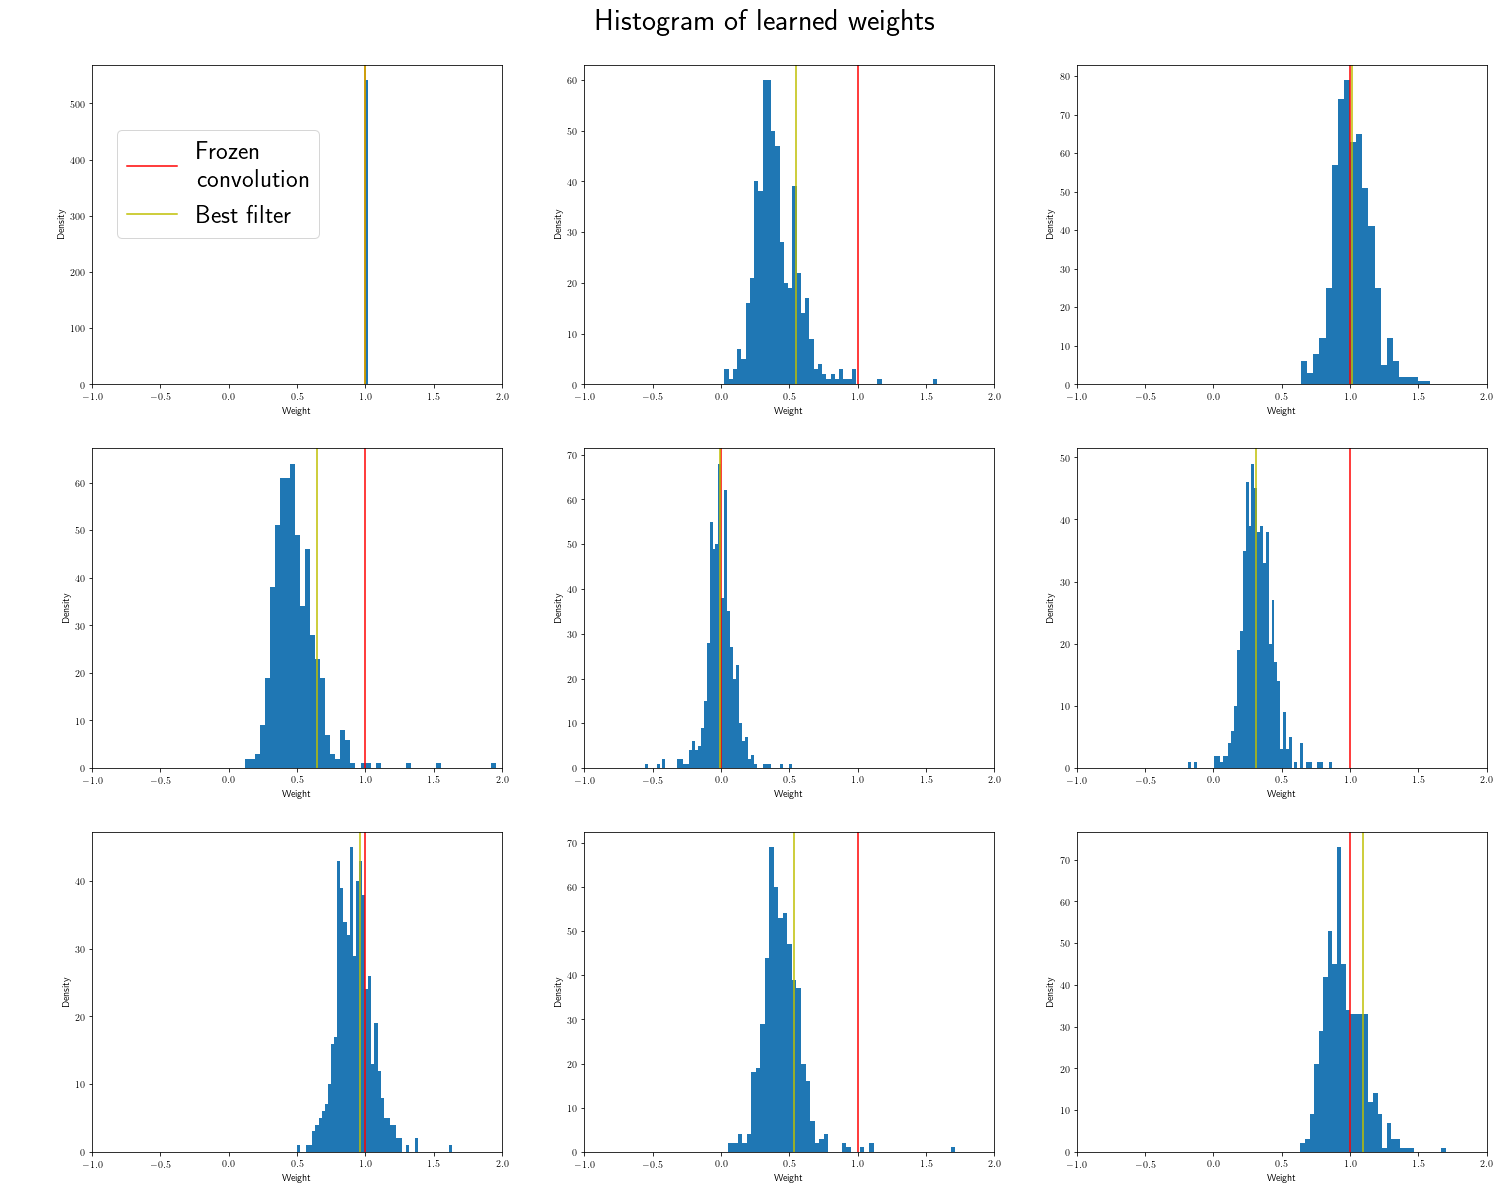

In [143]:
%matplotlib inline
with open("hyperparameters_unfrozen_convolution_relu_for_9x9.pl", "rb") as handle:
    results = pickle.load(handle)
acc = np.array(results["best_val_acc_hist"])
acc = np.where(acc > 0.89)
print(len(acc[0]))
# acc
w = []
for idx in acc[0]:
#     print(idx)
    w.append(results["conv_params"]["weight"][idx])


a,b,c,d,e,f,g,h,i = [], [], [], [], [], [], [], [], []
for par in w:
    left_corner = par[0, 0, 0, 0]
    sign_convention = (left_corner)
    a.append(par[0, 0, 0, 0] / left_corner)
    b.append(par[0, 0, 0, 1] / left_corner)
    c.append(par[0, 0, 0, 2] / left_corner)
    d.append(par[0, 0, 1, 0] / left_corner)
    e.append(par[0, 0, 1, 1] / left_corner)
    f.append(par[0, 0, 1, 2] / left_corner)
    g.append(par[0, 0, 2, 0] / left_corner)
    h.append(par[0, 0, 2, 1] / left_corner)
    i.append(par[0, 0, 2, 2] / left_corner)
# a,b,c,d,e,f,g,h,i = [np.array(_)[np.abs(np.array(_)) < 0.3] for _ in [a,b,c,d,e,f,g,h,i]]
fig, axs = plt.subplots(3, 3)
print("axs", axs.shape)
fig.set_figheight(20)
fig.set_figwidth(25)
min_x = -1
max_x = 2
vline = 1
num_bins = 50
axs[0, 0].hist(a, num_bins)
axs[0, 0].axvline(vline, color = "r", label = "Frozen \n convolution")
axs[0, 0].set_xlim(min_x, max_x)
axs[0, 1].hist(b, num_bins)
axs[0, 1].axvline(vline, color = "r")
axs[0, 1].set_xlim(min_x, max_x)
axs[0, 2].hist(c, num_bins)
axs[0, 2].axvline(vline, color = "r")
axs[0, 2].set_xlim(min_x, max_x)
axs[1, 0].hist(d, num_bins)
axs[1, 0].axvline(vline, color = "r")
axs[1, 0].set_xlim(min_x, max_x)
axs[1, 1].hist(e, num_bins)
axs[1, 1].axvline(0, color = "r")
axs[1, 1].set_xlim(min_x, max_x)
axs[1, 2].hist(f, num_bins)
axs[1, 2].axvline(vline, color = "r")
axs[1, 2].set_xlim(min_x, max_x)
axs[2, 0].hist(g, num_bins)
axs[2, 0].axvline(vline, color = "r")
axs[2, 0].set_xlim(min_x, max_x)
axs[2, 1].hist(h, num_bins)
axs[2, 1].axvline(vline, color = "r")
axs[2, 1].set_xlim(min_x, max_x)
print(axs[2, 2].hist(i, num_bins))
axs[2, 2].axvline(vline, color = "r")
(axs[2, 2].set_xlim(min_x, max_x))
for i in range(3):
    for j in range(3):
        axs[i, j].set_xlabel("Weight")
        axs[i, j].set_ylabel("Density")
# handles, labels = axs[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels, loc=(0.078, 0.8), fontsize = 20)
print("labels", labels)

best_array = np.array([[-0.1155, -0.0632, -0.1173],
          [-0.0750,  0.0006, -0.0363],
          [-0.1106, -0.0615, -0.1268]])
for i in range(3):
    for j in range(3):
        axs[i, j].axvline(best_array[i,j]/best_array[0,0], color = "y", label = "Best filter")

fig.suptitle(r"Histogram of learned weights", fontsize = 30, y = 0.92)        
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.078, 0.8), fontsize = 25)
fig.savefig("p15.png", bbox_inches="tight")
fig.show()

In [138]:
np.argsort(np.array(results["best_val_acc_hist"]))[-5:]

array([217, 410, 732, 231, 475])

In [140]:
results["conv_params"]["weight"][475]

tensor([[[[-0.1155, -0.0632, -0.1173],
          [-0.0750,  0.0006, -0.0363],
          [-0.1106, -0.0615, -0.1268]]]])

axs (3, 3)
labels ['Frozen \n convolution']


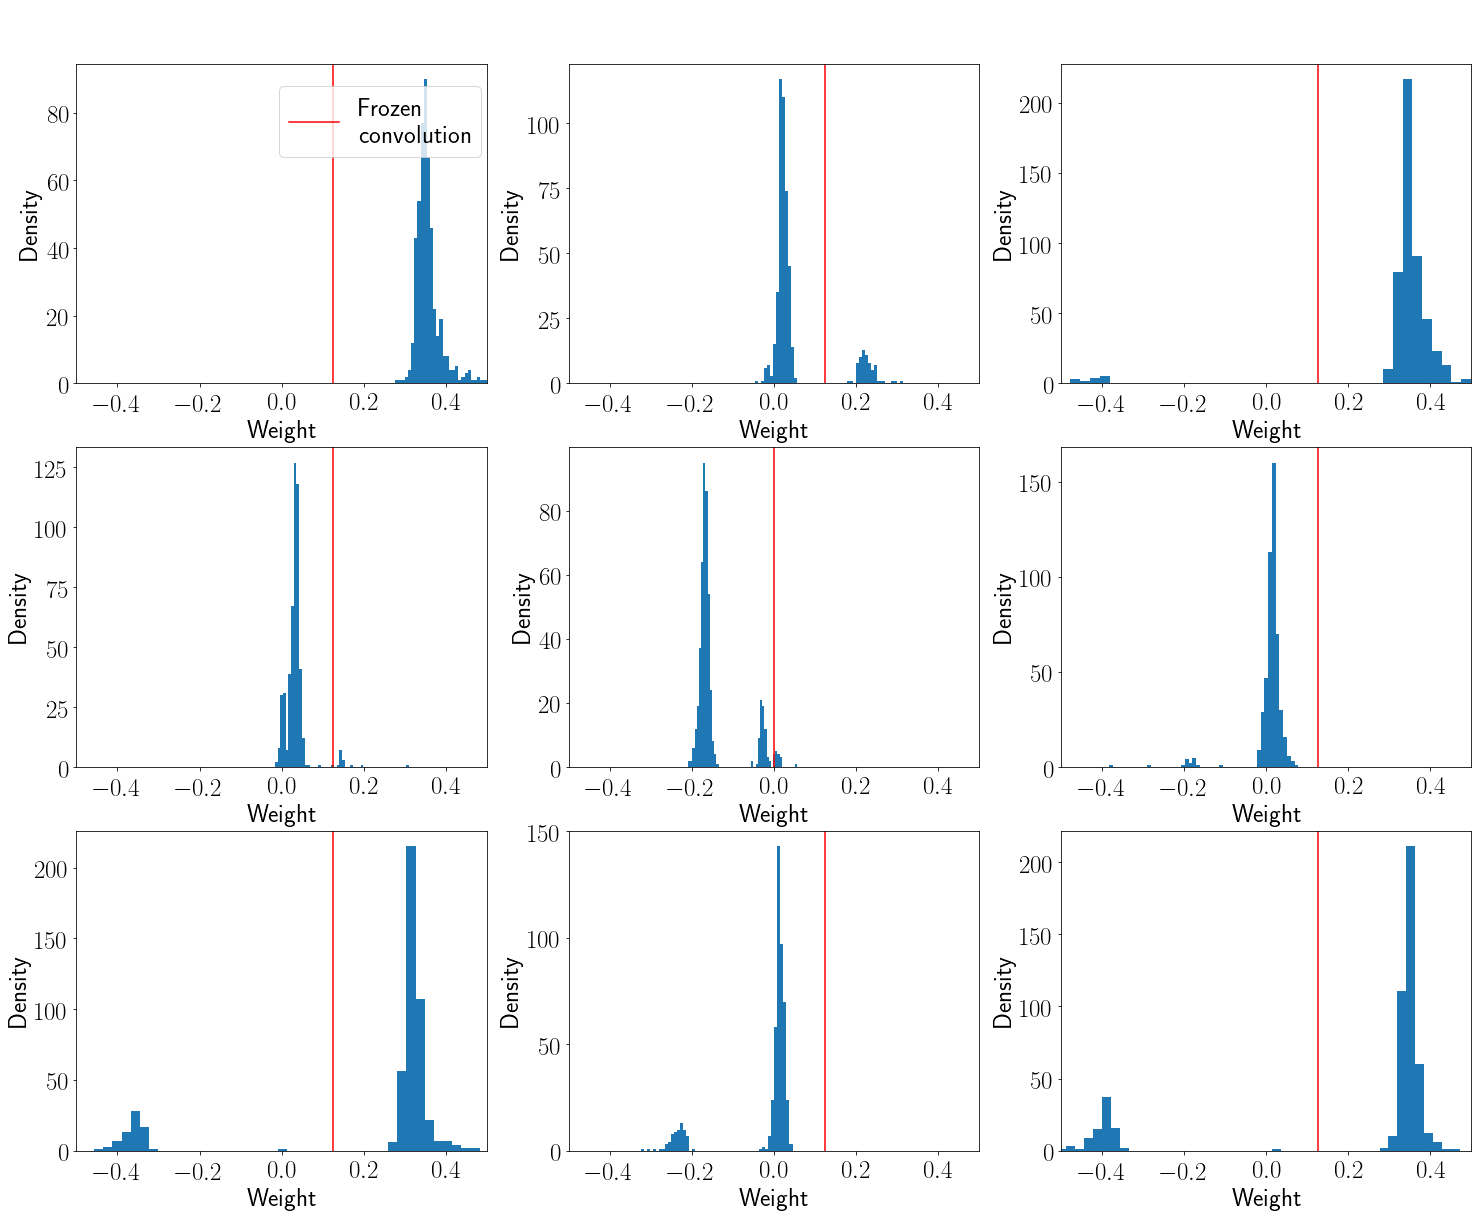

In [40]:
with open("../layer_by_layer/unfrozen_convolution_relu.pl", "rb") as handle:
    results = pickle.load(handle)
w = results["conv_params"]
a,b,c,d,e,f,g,h,i = [], [], [], [], [], [], [], [], []
for par in w["weight"]:
    left_corner = par[0, 0, 0, 0]
    sign_convention = np.sign(left_corner)
    a.append(np.abs(left_corner))
    b.append(par[0, 0, 0, 1] * sign_convention)
    c.append(par[0, 0, 0, 2] * sign_convention)
    d.append(par[0, 0, 1, 0] * sign_convention)
    e.append(par[0, 0, 1, 1] * sign_convention)
    f.append(par[0, 0, 1, 2] * sign_convention)
    g.append(par[0, 0, 2, 0] * sign_convention)
    h.append(par[0, 0, 2, 1] * sign_convention)
    i.append(par[0, 0, 2, 2] * sign_convention)
a,b,c,d,e,f,g,h,i = [np.array(_) for _ in [a,b,c,d,e,f,g,h,i]]
fig, axs = plt.subplots(3, 3)
print("axs", axs.shape)
fig.set_figheight(20)
fig.set_figwidth(25)
hist_array = [[a, b, c], [d, e, f], [g, h, i]]
for x_id in range(3):
    for y_id in range(3):
        axs[x_id, y_id].hist(hist_array[x_id][y_id], 50)
        if x_id == 1 & y_id == 1:
            axs[x_id, y_id].axvline(0, color = "r", label = "Frozen \n convolution")
        else:
            axs[x_id, y_id].axvline(1/8, color = "r", label = "Frozen \n convolution")
        axs[x_id, y_id ].set_xlim(-0.5, 0.5)
        axs[x_id, y_id].set_xlabel("Weight")
        axs[x_id, y_id].set_ylabel("Density")
handles, labels = axs[0, 0].get_legend_handles_labels()
print("labels", labels)
fig.legend(handles, labels, loc=(0.188, 0.87))
plt.show()

axs (3, 3)
labels ['Frozen \n convolution']


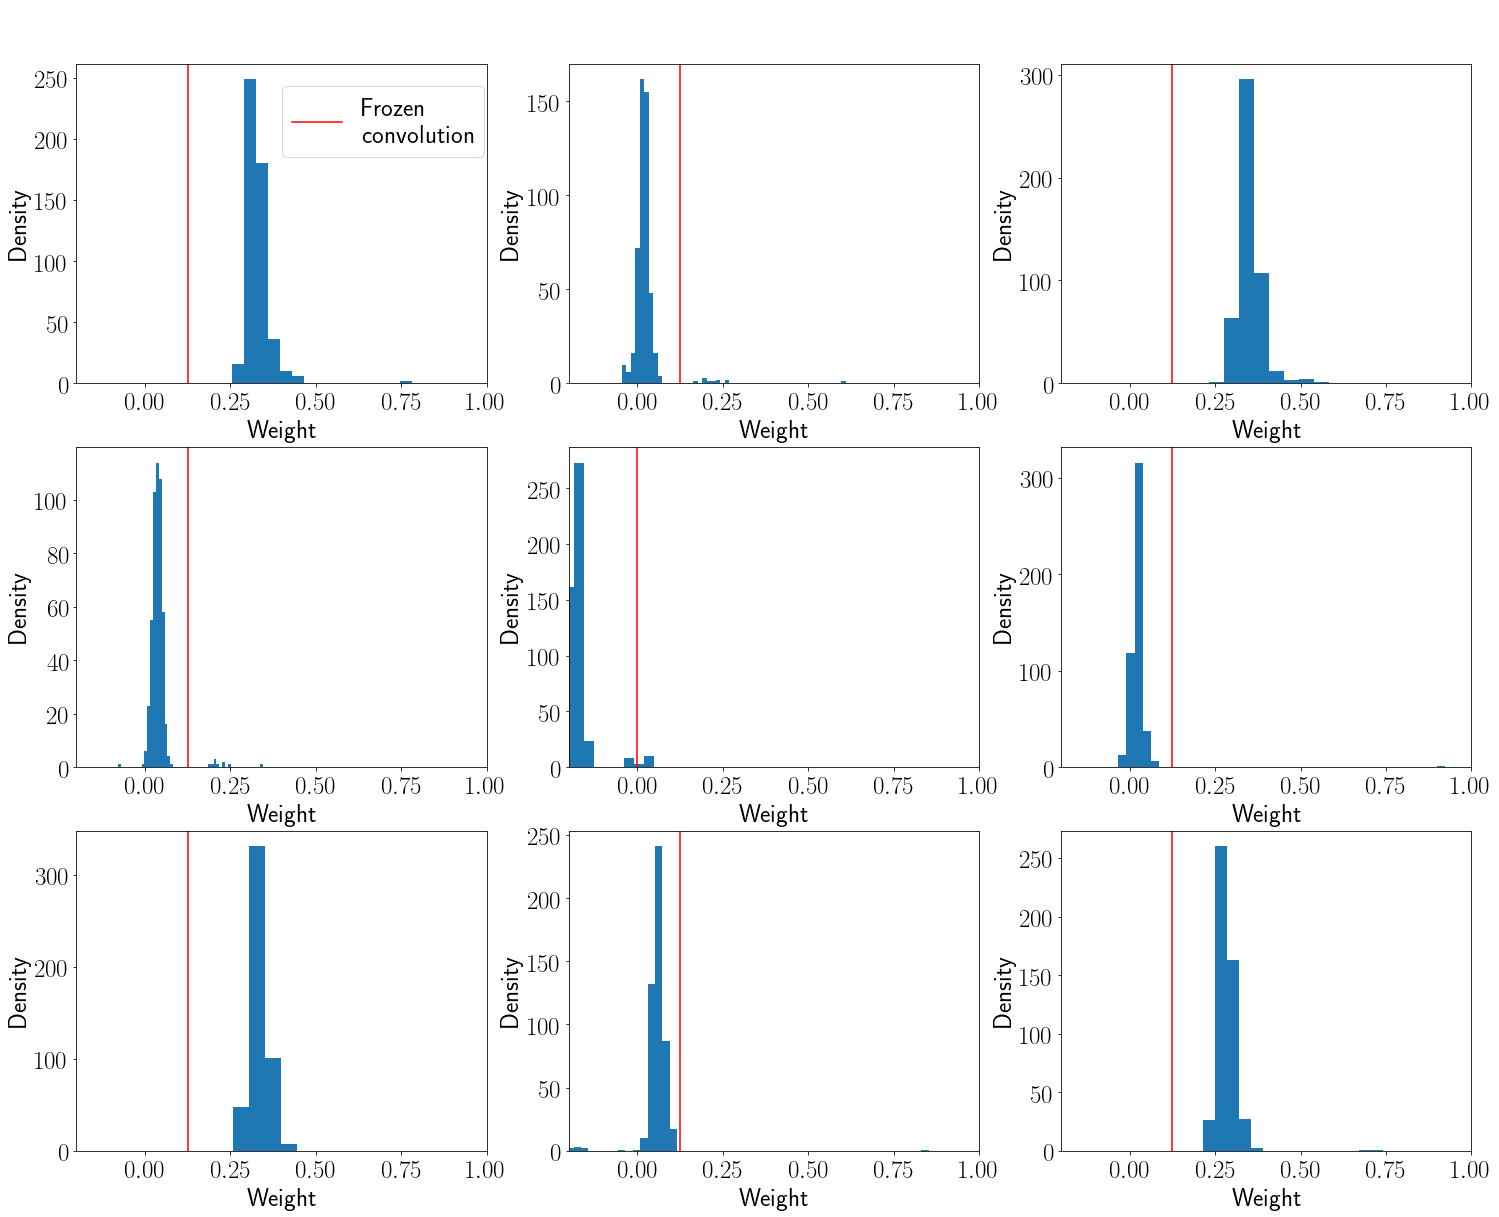

In [43]:
with open("../layer_by_layer/unfrozen_convolution_relu9x9.pl", "rb") as handle:
    results = pickle.load(handle)
w = results["conv_params"]
a,b,c,d,e,f,g,h,i = [], [], [], [], [], [], [], [], []
for par in w["weight"]:
    left_corner = par[0, 0, 0, 0]
    sign_convention = np.sign(left_corner)
    a.append(np.abs(left_corner))
    b.append(par[0, 0, 0, 1] * sign_convention)
    c.append(par[0, 0, 0, 2] * sign_convention)
    d.append(par[0, 0, 1, 0] * sign_convention)
    e.append(par[0, 0, 1, 1] * sign_convention)
    f.append(par[0, 0, 1, 2] * sign_convention)
    g.append(par[0, 0, 2, 0] * sign_convention)
    h.append(par[0, 0, 2, 1] * sign_convention)
    i.append(par[0, 0, 2, 2] * sign_convention)
a,b,c,d,e,f,g,h,i = [np.array(_) for _ in [a,b,c,d,e,f,g,h,i]]
fig, axs = plt.subplots(3, 3)
print("axs", axs.shape)
fig.set_figheight(20)
fig.set_figwidth(25)
hist_array = [[a, b, c], [d, e, f], [g, h, i]]
for x_id in range(3):
    for y_id in range(3):
        axs[x_id, y_id].hist(hist_array[x_id][y_id], 50)
        if x_id == 1 & y_id == 1:
            axs[x_id, y_id].axvline(0, color = "r", label = "Frozen \n convolution")
        else:
            axs[x_id, y_id].axvline(1/8, color = "r", label = "Frozen \n convolution")
        axs[x_id, y_id ].set_xlim(-0.2, 1.0)
        axs[x_id, y_id].set_xlabel("Weight")
        axs[x_id, y_id].set_ylabel("Density")
handles, labels = axs[0, 0].get_legend_handles_labels()
print("labels", labels)
fig.legend(handles, labels, loc=(0.188, 0.87))
plt.show()

axs (3, 3)
labels ['Frozen \n convolution']


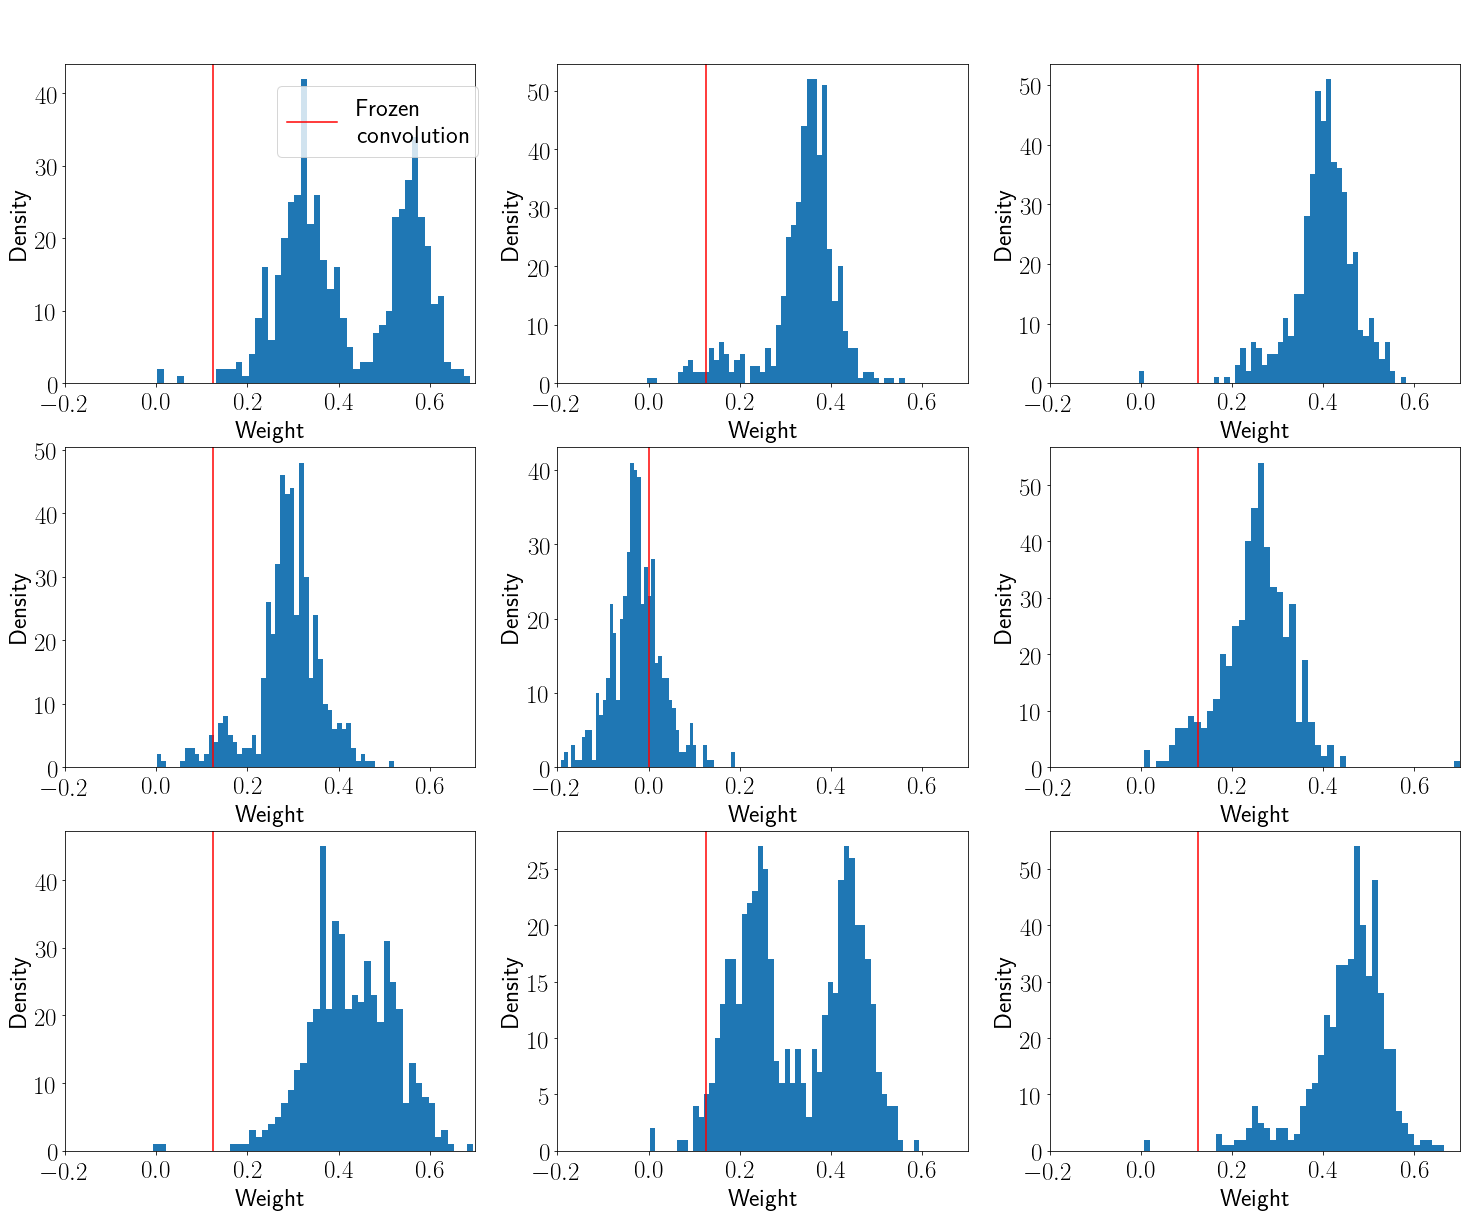

In [14]:
i = 0
w = results["conv_params"][f"weight_{i}"]
a,b,c,d,e,f,g,h,i = [], [], [], [], [], [], [], [], []
for par in w:
    par = par.cpu().detach().numpy()
    left_corner = par[0, 0, 0, 0]
    sign_convention = np.sign(left_corner)
    a.append(np.abs(left_corner))
    b.append(par[0, 0, 0, 1] * sign_convention)
    c.append(par[0, 0, 0, 2] * sign_convention)
    d.append(par[0, 0, 1, 0] * sign_convention)
    e.append(par[0, 0, 1, 1] * sign_convention)
    f.append(par[0, 0, 1, 2] * sign_convention)
    g.append(par[0, 0, 2, 0] * sign_convention)
    h.append(par[0, 0, 2, 1] * sign_convention)
    i.append(par[0, 0, 2, 2] * sign_convention)
a,b,c,d,e,f,g,h,i = [np.array(_)[np.abs(np.array(_)) < 100] for _ in [a,b,c,d,e,f,g,h,i]]
fig, axs = plt.subplots(3, 3)
print("axs", axs.shape)
fig.set_figheight(20)
fig.set_figwidth(25)
axs[0, 0].hist(a, 50)
axs[0, 0].axvline(1/8, color = "r", label = "Frozen \n convolution")
axs[0, 0].set_xlim(-0.2, 0.7)
axs[0, 1].hist(b, 50)
axs[0, 1].axvline(1/8, color = "r")
axs[0, 1].set_xlim(-0.2, 0.7)
axs[0, 2].hist(c, 50)
axs[0, 2].axvline(1/8, color = "r")
axs[0, 2].set_xlim(-0.2, 0.7)
axs[1, 0].hist(d, 50)
axs[1, 0].axvline(1/8, color = "r")
axs[1, 0].set_xlim(-0.2, 0.7)
axs[1, 1].hist(e, 50)
axs[1, 1].axvline(0, color = "r")
axs[1, 1].set_xlim(-0.2, 0.7)
axs[1, 2].hist(f, 50)
axs[1, 2].axvline(1/8, color = "r")
axs[1, 2].set_xlim(-0.2, 0.7)
axs[2, 0].hist(g, 50)
axs[2, 0].axvline(1/8, color = "r")
axs[2, 0].set_xlim(-0.2, 0.7)
axs[2, 1].hist(h, 50)
axs[2, 1].axvline(1/8, color = "r")
axs[2, 1].set_xlim(-0.2, 0.7)
axs[2, 2].hist(i, 50)
axs[2, 2].axvline(1/8, color = "r")
axs[2, 2].set_xlim(-0.2, 0.7)
for i in range(3):
    for j in range(3):
        axs[i, j].set_xlabel("Weight")
        axs[i, j].set_ylabel("Density")
handles, labels = axs[0, 0].get_legend_handles_labels()
print("labels", labels)
fig.legend(handles, labels, loc=(0.188, 0.87))
fig.show()

# RG Flow

In [2]:
from scipy.stats import zscore
lattices = ["2187x2187", "729x729", "243x243", "81x81", "27x27", "9x9"]
a_ratio,b_ratio,c_ratio,d_ratio,e_ratio,f_ratio,g_ratio,h_ratio,i_ratio = [], [], [], [], [], [], [], [], []
a_std,b_std,c_std,d_std,e_std,f_std,g_std,h_std,i_std = [], [], [], [], [], [], [], [], []
for lattice in lattices:
    with open(f"hyperparameters_unfrozen_convolution_relu_for_{lattice}.pl", "rb") as handle:
        results = pickle.load(handle)
    acc = np.array(results["best_val_acc_hist"])
    acc = np.where(acc > 0.9)
    print(len(acc[0]))
    # acc
    w = []
    for idx in acc[0]:
    #     print(idx)
        w.append(results["conv_params"]["weight"][idx])


    a,b,c,d,e,f,g,h,i = [], [], [], [], [], [], [], [], []
    a_to_a, b_to_a, c_to_a, d_to_a, e_to_a, f_to_a, g_to_a, h_to_a, i_to_a = [], [], [], [], [], [], [], [], []
    for par in w:
        left_corner = par[0, 0, 0, 0]
        sign_convention = (left_corner)
        a_to_a.append(par[0, 0, 0, 0] / left_corner)
        b_to_a.append(par[0, 0, 0, 1] / left_corner)
        c_to_a.append(par[0, 0, 0, 2] / left_corner)
        d_to_a.append(par[0, 0, 1, 0] / left_corner)
        e_to_a.append(par[0, 0, 1, 1] / left_corner)
        f_to_a.append(par[0, 0, 1, 2] / left_corner)
        g_to_a.append(par[0, 0, 2, 0] / left_corner)
        h_to_a.append(par[0, 0, 2, 1] / left_corner)
        i_to_a.append(par[0, 0, 2, 2] / left_corner)
    a,b,c,d,e,f,g,h,i = [], [], [], [], [], [], [], [], []
    for idx, zs in enumerate(zscore(a_to_a)):
        a.append(1)
    for idx, zs in enumerate(zscore(b_to_a)):
        if abs(zs) < 2:
            b.append(b_to_a[idx])
    for idx, zs in enumerate(zscore(c_to_a)):
        if abs(zs) < 2:
            c.append(c_to_a[idx])
    for idx, zs in enumerate(zscore(d_to_a)):
        if abs(zs) < 2:
            d.append(d_to_a[idx])
    for idx, zs in enumerate(zscore(e_to_a)):
        if abs(zs) < 2:
            e.append(e_to_a[idx])
    for idx, zs in enumerate(zscore(f_to_a)):
        if abs(zs) < 2:
            f.append(f_to_a[idx])
    for idx, zs in enumerate(zscore(g_to_a)):
        if abs(zs) < 2:
            g.append(g_to_a[idx])
    for idx, zs in enumerate(zscore(h_to_a)):
        if abs(zs) < 2:
            h.append(h_to_a[idx])
    for idx, zs in enumerate(zscore(i_to_a)):
        if abs(zs) < 2:
            i.append(i_to_a[idx])
    
    a_ratio.append(np.mean(a))
    b_ratio.append(np.mean(b))
    c_ratio.append(np.mean(c))
    d_ratio.append(np.mean(d))
    e_ratio.append(np.mean(e))
    f_ratio.append(np.mean(f))
    g_ratio.append(np.mean(g))
    h_ratio.append(np.mean(h))
    i_ratio.append(np.mean(i))
    a_std.append(np.std(a))
    b_std.append(np.std(b))
    c_std.append(np.std(c))
    d_std.append(np.std(d))
    e_std.append(np.std(e))
    f_std.append(np.std(f))
    g_std.append(np.std(g))
    h_std.append(np.std(h))
    i_std.append(np.std(i))
    
    
    

489


/Users/qanguyen/anaconda3/envs/renormalization/lib/python3.7/site-packages/scipy/stats/stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


662
1000
774
733
763


axs (3, 3)
stds[i][j][::-1] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
stds[i][j][::-1] [0.26345086, 0.20520878, 0.078016244, 0.11804344, 0.123077326, 0.107847326]
stds[i][j][::-1] [0.3004009, 0.15795653, 0.08642507, 0.14436388, 0.09271401, 0.10522795]
stds[i][j][::-1] [0.23915501, 0.1815752, 0.1301879, 0.15344638, 0.10486838, 0.1513708]
stds[i][j][::-1] [0.2896271, 0.24887513, 0.09270001, 0.12979056, 0.104263276, 0.110091396]
stds[i][j][::-1] [0.25594366, 0.13384272, 0.108147874, 0.11355312, 0.11330722, 0.12288026]
stds[i][j][::-1] [0.25455564, 0.12689163, 0.10358866, 0.13482243, 0.117559895, 0.11363644]
stds[i][j][::-1] [0.27678695, 0.18719143, 0.11507675, 0.11120391, 0.08385259, 0.115494825]
stds[i][j][::-1] [0.32371914, 0.21983556, 0.07965088, 0.1303011, 0.11148504, 0.12411427]


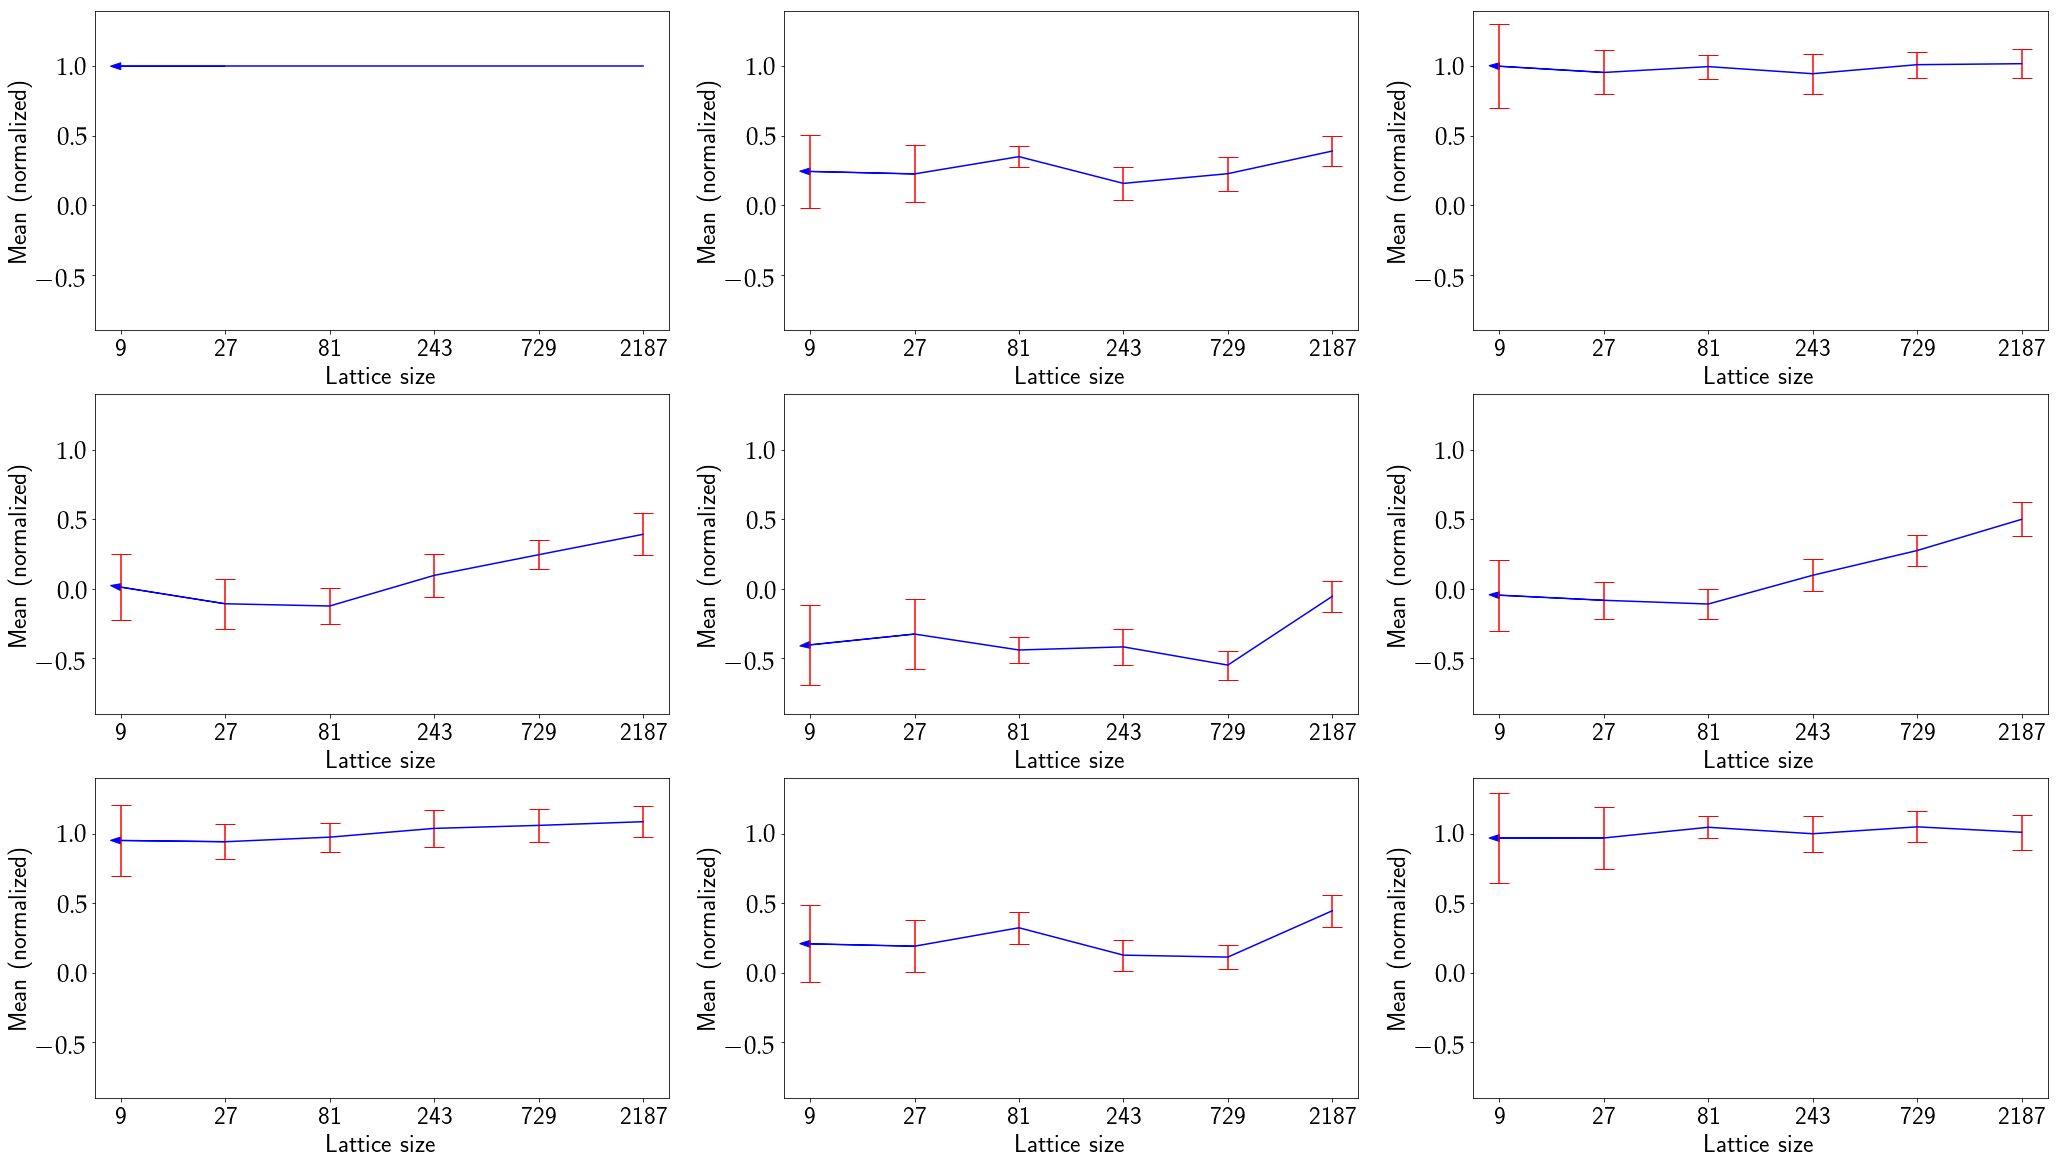

In [11]:
rc('font',**{'family':'sans-serif','sans-serif':['Palatino'], "size":25})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

fig, axs = plt.subplots(3, 3)
print("axs", axs.shape)
fig.set_figheight(20)
fig.set_figwidth(35)
ratios = [[a_ratio,b_ratio,c_ratio],[d_ratio,e_ratio,f_ratio],[g_ratio,h_ratio,i_ratio]]
stds = [[a_std,b_std,c_std],[d_std,e_std,f_std],[g_std,h_std,i_std]]
title = [["a\_ratio","b\_ratio","c\_ratio"],["d\_ratio","e\_ratio","f\_ratio"],["g\_ratio","h\_ratio","i\_ratio"]]
for i in range(3):
    for j in range(3):
        axs[i, j].set_xlabel("Lattice size")
        axs[i, j].set_ylabel("Mean (normalized)")
#         axs[i, j].text(0.5, 0.5, r"{}".format(title[i][j]))
        axs[i, j].errorbar( range(6), ratios[i][j][::-1],color="blue", yerr=stds[i][j][::-1], ecolor="red", capsize=0 if i == j and i == 0 else 10)
#         print("ratios[i][j][::-1]", ratios[i][j][::-1])
        print("stds[i][j][::-1]", stds[i][j][::-1])
        axs[i, j].arrow(1, ratios[i][j][::-1][1], 0-1, ratios[i][j][::-1][0]-ratios[i][j][::-1][1],head_width=0.05,head_length=0.1,color="blue")
        axs[i, j].set_xticklabels(np.power(3, np.arange(1, 8)))
        axs[i, j].set_ylim(-0.9, 1.4)
        
#         axs[i, j].set_xscale('log')
fig.savefig("p16.png", bbox_inches="tight")


([<matplotlib.axis.XTick at 0x120c6f240>,
 <a list of 6 Text xticklabel objects>)

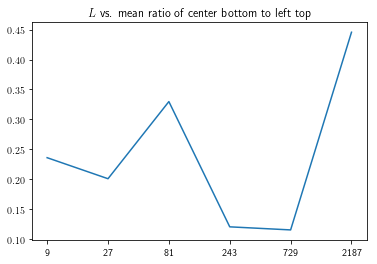

In [51]:
plt.plot(range(2, 8), center_bottom_to_corner_list[::-1])
plt.title(r"$L$ vs. mean ratio of center bottom to left top")
plt.xticks(range(2, 8), np.power(3, np.arange(2, 8)))

# Hyperparameter tuning stuff

In [0]:
!pip install -U --target=/usr/local/lib/python3.6/dist-packages git+https://github.com/anhhuyalex/Ax.git
  
%cd /content
# %cd /usr/local/lib/python3.6/dist-packages
!rm -rf botorch
%cd /content
!git clone https://github.com/pytorch/botorch.git
%cd botorch
!pip install .

  Cloning https://github.com/anhhuyalex/Ax.git to /tmp/pip-req-build-jtszmw_4
  Running command git clone -q https://github.com/anhhuyalex/Ax.git /tmp/pip-req-build-jtszmw_4
     |████████████████████████████████| 174kB 5.0MB/s 
     |████████████████████████████████| 133kB 46.1MB/s 
     |████████████████████████████████| 10.5MB 45.2MB/s 
     |████████████████████████████████| 25.2MB 44.0MB/s 
     |████████████████████████████████| 7.1MB 29.1MB/s 
     |████████████████████████████████| 748.9MB 16kB/s 
     |████████████████████████████████| 215kB 37.6MB/s 
     |████████████████████████████████| 235kB 40.0MB/s 
     |████████████████████████████████| 512kB 45.5MB/s 
     |████████████████████████████████| 20.4MB 32.8MB/s 
     |████████████████████████████████| 6.7MB 34.9MB/s 
     |████████████████████████████████| 286kB 42.9MB/s 
  Created wheel for ax-platform: filename=ax_platform-0.1.4-cp36-cp36m-linux_x86_64.whl size=918246 sha256=641e6d5a2b2257e17efddfb806ec1ae77ac80fc294386

/content
/content
Cloning into 'botorch'...
remote: Enumerating objects: 5976, done.
remote: Total 5976 (delta 0), reused 0 (delta 0), pack-reused 5976
Receiving objects: 100% (5976/5976), 10.31 MiB | 16.78 MiB/s, done.
Resolving deltas: 100% (3899/3899), done.
/content/botorch
Processing /content/botorch
  Created wheel for botorch: filename=botorch-0.1.3-cp36-none-any.whl size=175825 sha256=65ce91cf51bd45a64ffecd33ccdb2a9a43898831891c44df2e0a67016cfd33b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-yqt8d5dr/wheels/d8/0e/3f/502176509633fec729eabc1a42e465b3603faf0c30b4782f33
Successfully built botorch
  Found existing installation: botorch 0.1.3
    Uninstalling botorch-0.1.3:
      Successfully uninstalled botorch-0.1.3


In [0]:
# %cd  /content/drive/My\ Drive/Year\ 4\:\ Synthesis/NS162\:\ Statistical\ Mechanics/Renormalization\ Research\ Project/renormalization/supervised_convnet/t_2.269/3x3/
import pickle
# run_mode = "frozen_convolution_no_center_relu"
# run_mode = "frozen_convolution_pretrained_relu"
# run_mode = "unfrozen_convolution_relu"
run_mode = "unfrozen_convolution_3_channels"
# run_mode = "unfrozen_convolution_2_channels"
with open(f"colab/hyperparameters_{run_mode}.pl", "rb") as handle:
    hyper = pickle.load(handle)

In [0]:


from ax import RangeParameter, ParameterType
from ax.service.ax_client import AxClient
from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from ax.utils.notebook.plotting import render, init_notebook_plotting

ax_client = AxClient()
ax_client = ax_client.from_json_snapshot(hyper["axclient"])

In [0]:
#pre-trained
ax_client.get_best_parameters()

({'batch_size': 5000,
  'betas0': 0.20000000000000004,
  'betas1': 1.0081196321129792e-05,
  'lr': 0.02564592414390474,
  'n_epochs': 180,
  'train_size': 5000,
  'weight_decay': 6.21073259786956e-05},
 ({'objective': 0.903033105700047},
  {'objective': {'objective': 5.147060778236302e-05}}))

In [0]:
#unfrozen_convolution_relu
ax_client.get_best_parameters()

({'batch_size': 86,
  'train_size': 4277,
  'n_epochs': 250,
  'lr': 0.004388469485690077,
  'weight_decay': 2.346792703571872e-05,
  'betas0': 0.0018179320494754046,
  'betas1': 0.001354073715524798},
 ({'objective': 0.9050338479075092},
  {'objective': {'objective': 4.757005812926546e-06}}))

In [0]:
#frozen_convolution_no_center_relu
ax_client.get_best_parameters()

({'batch_size': 100,
  'betas0': 0.15428681703555264,
  'betas1': 1e-05,
  'lr': 0.021919796543990972,
  'n_epochs': 250,
  'train_size': 5000,
  'weight_decay': 0.0008230830669560186},
 ({'objective': 0.9005434515585102},
  {'objective': {'objective': 0.0003031106598752843}}))

In [0]:
#unfrozen_convolution_2_channels
ax_client.get_best_parameters()

({'batch_size': 968,
  'train_size': 5000,
  'n_epochs': 250,
  'lr': 0.0070890201458810925,
  'weight_decay': 0.00019488234448160615,
  'betas0': 0.13209249743733834,
  'betas1': 9.581886527012395e-05},
 ({'objective': 0.9095199693508492},
  {'objective': {'objective': 2.6589601760250542e-05}}))

In [0]:
#unfrozen_convolution_3_channels
ax_client.get_best_parameters()

({'batch_size': 3521,
  'train_size': 5000,
  'n_epochs': 193,
  'lr': 0.008499899017388025,
  'weight_decay': 7.165827861901277e-05,
  'betas0': 0.20000000000000004,
  'betas1': 0.003211923010710316},
 ({'objective': 0.9182530304574827},
  {'objective': {'objective': 2.107995656736222e-06}}))

# Mutual info calculation

In [14]:
import matplotlib.pyplot as plt
import train, frozen
import sys
sys.path.insert(0, "../../")
import supervised_convnet
import pickle
from collections import defaultdict
import numpy as np
from matplotlib import rc
rc('font',**{'size': 20})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [1]:
# Mutual information calculation
import numpy as np
from collections import defaultdict
import hashlib
# correlated_data = np.load("../../../ising81x81.npz")["array1"]#[:10000,:9,:9]

In [37]:
from glob import glob
files = glob("../../../data_2187_1572395896/*")[:150]

In [38]:
dat = []
for f in files:
    dat.append(np.load(f)["arr_0"])

In [39]:
dat = np.array(dat)
dat = 2 * dat - 1

In [33]:
def get_key(array):
    return hashlib.sha256(array.tostring()).hexdigest()
  
def normalize_counts(p_dict):
    normalizer = sum(p_dict.values())
    for config, count in p_dict.items():
        p_dict[config] = count / normalizer
    return p_dict

def mutual_info_fine_grained_boundary_3(data):
    """
    boundary is only the 3x3 bordering strip
    x x *x* | *x* x x
    x x *x* | *x* x x
    x x *x* | *x* x x
    """
    n_samples, n_rows, n_columns = data.shape
    print(n_samples, n_rows, n_columns)
    
    # compute counts
    p_xy = defaultdict(int)
    p_x = defaultdict(int)
    p_y = defaultdict(int)
    n_samples = 200 # for testing, remove later
    for sample in range(n_samples):
        if sample % 100 == 0:
            print(sample, p_xy)
        for row in range(n_rows - 3):
            for column in range(n_columns - 6):
                rectangle = data[sample, row:(row + 3), column:(column+6)]
                
                boundary_x = rectangle[:, 3]
                p_x[get_key(boundary_x)] += 1
                boundary_y = rectangle[:, 3]
                p_y[get_key(boundary_y)] += 1
                joint_boundary = np.array([np.hstack((boundary_x, boundary_y))])
                p_xy[get_key(joint_boundary)] += 1


    # Normalize counts
    p_xy = normalize_counts(p_xy)
    p_x = normalize_counts(p_x)
    p_y = normalize_counts(p_y)
        
        
    
    # Generate all possible configurations of boundary conditions
    n = 6
    i = np.array(np.indices(n * (2,))).reshape(n, -1)
    xy_keys = (i[:, np.argsort(i.sum(0)[::-1], kind='mergesort')].T[::-1].reshape(-1, n)*2-1)

    # mi = <log (p(x, y)/p(x)p(y))>
    mi = 0
    for xy in xy_keys:
        joint_prob = p_xy[get_key(xy)]
        x = xy[:3]
        x_prob = p_x[get_key(x)]
        y = xy[3:6]
        y_prob = p_y[get_key(y)]
        print(f"xy: {xy}, joint_prob:_{joint_prob}, x_prob:_{x_prob}, y_prob:_{y_prob}")
        if joint_prob != 0:
            mi += np.log2(joint_prob/(x_prob * y_prob)) * joint_prob
        
        
            
    return p_xy, p_x, p_y, mi

p_xy, p_x, p_y, mi = mutual_info_fine_grained_boundary_3(correlated_data)

10000 9 9
0 defaultdict(<class 'int'>, {})
100 defaultdict(<class 'int'>, {'1e660ae46369c47157485f59f06f8ab5831d2f52a010018ade57603883908ab9': 87, 'b78fd32794d830b28113895aaaf767b4aa6f97851d88b39c47ba8d232ca96a4b': 83, '334658f1779808c7acf39a60f38dda5c542e257f8355b64cde24238445927386': 607, '80a76a18acf8cb64fec3a659ffc4bab4a87cd9a6fde4dab2161a8751d136c9d2': 745, '836358f1eb6de760878996b6273bc3de91d383dcb57110f6a1dbce013f6f0b31': 105, '5f1c566154d906b3c300e3427f08ce80669c405b83ec6434be78ba20892dc7bb': 38, '22a32777ed4d352dd72ba821f432aa7ae3463c4526866d1e1116a6e021e58e77': 93, '68cbe9a301e3409609b1d3b0cac3aaf75dd3b4f072c86f46083d5b7ba88e787b': 42})
xy: [-1 -1 -1 -1 -1 -1], joint_prob:_0.37, x_prob:_0.37, y_prob:_0.37
xy: [ 1 -1 -1 -1 -1 -1], joint_prob:_0, x_prob:_0.05694444444444444, y_prob:_0.37
xy: [-1  1 -1 -1 -1 -1], joint_prob:_0, x_prob:_0.025833333333333333, y_prob:_0.37
xy: [-1 -1  1 -1 -1 -1], joint_prob:_0, x_prob:_0.05333333333333334, y_prob:_0.37
xy: [-1 -1 -1  1 -1 -1], joi

In [79]:
len(p_xy.keys())

64

In [15]:
def get_key(array):
    return hashlib.sha256(array.tostring()).hexdigest()
  
def normalize_counts(p_dict):
    normalizer = sum(p_dict.values())
    for config, count in p_dict.items():
        p_dict[config] = count / normalizer
    return p_dict

def mutual_info_fine_grained_5(data):
    """
    boundary is the 3x3 bordering strip and the 2 non-central spins bordering the border
    x *x* *x* | *x* *x* x
    x  x  *x* | *x*  x  x
    x *x* *x* | *x* *x* x
    """
    data = np.sign(data  ) # discretize data
    data = data.astype("float64")
    print(f"data: {data}")
#     return
    
    n_samples, n_rows, n_columns = data.shape
    print(n_samples, n_rows, n_columns)
    
    # compute counts
    p_xy = defaultdict(int)
    p_x = defaultdict(int)
    p_y = defaultdict(int)
    n_samples = 200000 # for testing, remove later
    seen_boundaries = set()
    for _ in range(n_samples):
        
        sample = np.random.randint(data.shape[0])
#         print("sample", sample)
        row, col = np.random.randint(data.shape[-1], size = 2)
#         if sample % 100 == 0:
#             print(sample, p_xy)
        if (row > data.shape[-1] - 3) or (col > data.shape[-1] - 6):
            rectangle = np.pad(data[sample], 6)[row:(row + 3), col:(col+6)]
        else:
            rectangle = data[sample, row:(row + 3), col:(col+6)]
        boundary_x = np.hstack((rectangle[:, 2], rectangle[0, 1], rectangle[2, 1]))
        p_x[get_key(boundary_x)] += 1
        boundary_y = np.hstack((rectangle[:, 3], rectangle[0, 4], rectangle[2, 4]))
        p_y[get_key(boundary_y)] += 1
        joint_boundary = np.array([np.hstack((boundary_x, boundary_y))])
        p_xy[get_key(joint_boundary)] += 1
        seen_boundaries.add(joint_boundary.tostring())
        
#     mutual_info = sum_over_xy of p(x,y)*log(p)

    # Normalize counts
    p_xy = normalize_counts(p_xy)
    p_x = normalize_counts(p_x)
    p_y = normalize_counts(p_y)
    
    for xy_string in seen_boundaries:
        xy = np.fromstring(xy_string)
        
    
#     # Generate all possible configurations of boundary conditions
#     n = 10
#     i = np.array(np.indices(n * (2,))).reshape(n, -1)
#     xy_keys = (i[:, np.argsort(i.sum(0)[::-1], kind='mergesort')].T[::-1].reshape(-1, n)*2-1)

    # mi = <log (p(x, y)/p(x)p(y))>
    mi = 0
    no_config = []
    
    for xy_string in seen_boundaries:
        xy = np.fromstring(xy_string)
        print(xy)
        joint_prob = p_xy[get_key(xy)]
        x = xy[0:5]
        x_prob = p_x[get_key(x)]
        y = xy[5:10]
        y_prob = p_y[get_key(y)]
#         print(f"boundary_x:{x}")
        if joint_prob != 0:
            mi += np.log2(joint_prob/(x_prob * y_prob)) * joint_prob
            no_config.append(xy)
        
        
            
    return p_xy, p_x, p_y, mi, no_config
p_xy, p_x, p_y, mi, no_config = mutual_info_fine_grained_5(dat)

data: [[[ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  ...
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]]

 [[-1.  1.  1. ... -1. -1. -1.]
  [-1.  1.  1. ...  1.  1. -1.]
  [-1. -1. -1. ...  1. -1. -1.]
  ...
  [-1. -1. -1. ... -1.  1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]]

 [[-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ...  1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  ...
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  [-1.  1. -1. ... -1. -1. -1.]]

 ...

 [[ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  ...
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1. -1.  1.]]

 [[ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  ...
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.

/Users/qanguyen/anaconda3/envs/renormalization/lib/python3.7/site-packages/ipykernel_launcher.py:58: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/Users/qanguyen/anaconda3/envs/renormalization/lib/python3.7/site-packages/ipykernel_launcher.py:71: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


[-1. -1.  1. -1. -1. -1.  1.  1. -1.  1.]
[ 1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
[ 1.  1. -1.  1. -1. -1.  1. -1. -1. -1.]
[ 1. -1.  1.  1.  1.  1. -1. -1.  1.  1.]
[-1. -1. -1.  1.  1.  1. -1.  1.  1.  1.]
[-1. -1. -1.  1. -1.  1. -1.  1.  1.  1.]
[-1.  1.  1. -1.  1.  1. -1.  1.  1. -1.]
[ 1.  1.  1. -1. -1.  1. -1. -1.  1. -1.]
[0. 0. 1. 0. 1. 0. 0. 1. 0. 1.]
[ 0.  0.  0.  0.  0.  1.  1. -1.  1.  1.]
[ 1.  1. -1.  1. -1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  1. -1. -1.  1.  1.]
[-1.  1. -1. -1. -1. -1. -1. -1. -1. -1.]
[ 1.  1. -1.  0.  0.  1.  1.  1. -1.  1.]
[-1. -1. -1.  0.  0. -1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1. -1. -1. -1. -1.  1.]
[-1.  1. -1.  0.  0. -1. -1.  1.  1.  1.]
[-1.  1. -1.  1. -1. -1. -1. -1.  1. -1.]
[ 1.  1.  1.  0.  0.  1. -1.  1. -1. -1.]
[ 1.  1. -1. -1.  1. -1.  1. -1. -1. -1.]
[ 1.  1. -1.  1.  1.  1.  1.  1.  1. -1.]
[-1. -1. -1.  1.  1. -1.  1.  1.  1.  1.]
[-1. -1. -1. -1. -1.  1. -1. -1. -1.  1.]
[-1. -1. -1.  1.  1.  1.  1. -1.  1.  1.]
[-

[ 1. -1. -1.  1.  1.  1.  1.  1.  1.  1.]
[-1.  1. -1. -1.  1.  1.  1.  1.  1. -1.]
[ 1. -1. -1. -1.  1.  1. -1. -1. -1. -1.]
[-1.  1. -1.  1. -1. -1. -1.  1. -1.  1.]
[-1.  1. -1. -1. -1.  1.  1. -1.  1. -1.]
[ 0.  0. -1.  0.  0.  0.  0.  1.  0.  1.]
[ 1. -1. -1.  1. -1. -1. -1. -1.  1. -1.]
[ 1. -1.  1.  1. -1.  1.  1. -1.  1. -1.]
[-1. -1.  1. -1. -1. -1. -1.  1. -1. -1.]
[ 1.  1. -1.  1.  1.  1. -1.  1.  1. -1.]
[-1.  1.  1.  1. -1. -1.  1.  1.  1. -1.]
[-1.  1. -1.  1. -1. -1.  1. -1. -1. -1.]
[ 1. -1. -1.  0.  0. -1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.  1.  1. -1.  1.  1.]
[ 1. -1. -1.  0.  0.  1. -1.  1.  1.  1.]
[-1.  1. -1.  1. -1. -1.  1.  1. -1.  1.]
[ 1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
[ 1.  1. -1.  1.  1.  1.  1. -1.  1.  1.]
[ 1. -1.  1.  1.  1.  1.  1.  1.  1. -1.]
[ 0.  0.  0.  0.  0. -1.  1. -1.  1. -1.]
[ 1. -1. -1. -1. -1.  1.  1.  1.  1. -1.]
[-1. -1.  1. -1. -1. -1.  1.  1.  1.  1.]
[-1. -1.  1. -1. -1.  1. -1.  1. -1.  1.]
[ 1. -1. -1. -1. -1. -1. -1. -1. -

In [27]:
mi # 2187x2187

0.7437676312230461

In [5]:
mi # 729x729

0.7816341840316443

In [8]:
mi # 243x243

0.795270527035214

In [63]:
mi # 81x81

0.8104184290659728

In [11]:
mi # 27x27

1.126535739351302

In [16]:
mi # 9x9

1.9499505731379898

In [33]:

dat = np.load("../../../ising_temp2.269_correlated729x729from2187x2187.npy")#[:1000]

In [40]:
def get_key(array):
    return hashlib.sha256(array.tostring()).hexdigest()
  
def normalize_counts(p_dict):
    normalizer = sum(p_dict.values())
    for config, count in p_dict.items():
        p_dict[config] = count / normalizer
    return p_dict

def mutual_info_coarse_grained(data):
    """
    boundary is the 3x3 bordering strip and the 2 non-central spins bordering the border
    x *x* *x* | *x* *x* x
    x  x  *x* | *x*  x  x
    x *x* *x* | *x* *x* x
    """
    data = np.sign(data  ) # discretize data
    data = data.astype("float64")
    print(f"data: {data}")
#     return
    
    n_samples, n_rows, n_columns = data.shape
    print(n_samples, n_rows, n_columns)
    
    # compute counts
    p_xy = defaultdict(int)
    p_x = defaultdict(int)
    p_y = defaultdict(int)
    n_samples = 10000 # for testing, remove later
    seen_boundaries = set()
    for _ in range(n_samples):
        
        sample = np.random.randint(data.shape[0])
#         print("sample", sample)
        row, col = np.random.randint(data.shape[-1], size = 2)
#         if sample % 100 == 0:
#             print(sample, p_xy)
        if (row > data.shape[-1] - 2) or (col > data.shape[-1] - 2):
            rectangle = np.pad(data[sample], 1)[row:(row + 1), col:(col+2)]
        else:
            rectangle = data[sample, row:(row + 1), col:(col+2)]
        
        p_xy[get_key(joint_boundary)] += 1
        seen_boundaries.add(joint_boundary.tostring())
#         print(boundary_x, boundary_y, joint_boundary)
#     mutual_info = sum_over_xy of p(x,y)*log(p)

    # Normalize counts
    p_xy = normalize_counts(p_xy)
    p_x = normalize_counts(p_x)
    p_y = normalize_counts(p_y)
    
    for xy_string in seen_boundaries:
        xy = np.fromstring(xy_string)
        
    
#     # Generate all possible configurations of boundary conditions
#     n = 10
#     i = np.array(np.indices(n * (2,))).reshape(n, -1)
#     xy_keys = (i[:, np.argsort(i.sum(0)[::-1], kind='mergesort')].T[::-1].reshape(-1, n)*2-1)

    # mi = <log (p(x, y)/p(x)p(y))>
    mi = 0
    no_config = []
    
    for xy_string in seen_boundaries:
        xy = np.fromstring(xy_string)
        print(xy)
        joint_prob = p_xy[get_key(xy)]
        x = xy[0]
        x_prob = p_x[get_key(x)]
        y = xy[1]
        y_prob = p_y[get_key(y)]
#         print(f"boundary_x:{x}")
        if joint_prob != 0:
            mi += np.log2(joint_prob/(x_prob * y_prob)) * joint_prob
            no_config.append(xy)
        
        
            
    return p_xy, p_x, p_y, mi, no_config
p_xy, p_x, p_y, mi, no_config = mutual_info_coarse_grained(dat)

data: [[[-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  ...
  [-1. -1. -1. ...  1.  1.  1.]
  [-1. -1. -1. ...  1.  1.  1.]
  [-1. -1. -1. ... -1. -1. -1.]]

 [[ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  ...
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]]

 [[ 1.  1.  1. ...  1.  1.  1.]
  [-1.  1.  1. ...  1.  1. -1.]
  [ 1.  1.  1. ... -1.  1. -1.]
  ...
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1. -1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]]

 ...

 [[ 1.  1.  1. ... -1. -1. -1.]
  [ 1.  1.  1. ... -1. -1. -1.]
  [-1. -1.  1. ... -1. -1. -1.]
  ...
  [-1. -1.  1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]
  [-1. -1. -1. ... -1. -1. -1.]]

 [[ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  [ 1.  1.  1. ...  1.  1.  1.]
  ...
  [ 1.  1. -1. ...  1.  1.  1.]
  [ 1. -1. -1. ...  1.  1.  1.]
  [ 1. -1. -1. ...  1.

/Users/qanguyen/anaconda3/envs/renormalization/lib/python3.7/site-packages/ipykernel_launcher.py:58: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/Users/qanguyen/anaconda3/envs/renormalization/lib/python3.7/site-packages/ipykernel_launcher.py:71: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


[ 1. -1.]
[1. 1.]
[-1.  1.]
[-1. -1.]


In [20]:
mi # 9x9

0.6335324802566205

In [25]:
mi # 27x27

0.5081651136320254

In [29]:
mi # 81x81

0.40077747534866137

In [32]:
mi # 243x243

0.4269913639143416

In [36]:
mi # 729x729

0.4389315622245423

In [41]:
mi # 2187x2187

0.4246509224561651

In [29]:
mutual_infs.append(mi)

In [30]:
mutual_infs

[0.7437676312230461]

In [50]:
with open("unfrozen_convolution_relu.pl", "rb") as handle:
    results = pickle.load(handle)
w = results["conv_params"]
b = results["best_val_acc_hist"]

In [51]:
np.argmax(b)

363

In [52]:
w["weight"][363]

tensor([[[[ 0.1150,  0.0497,  0.0995],
          [ 0.0486, -0.0215,  0.0339],
          [ 0.0952,  0.0345,  0.0959]]]])

In [88]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
from torch.autograd import Variable

class SupervisedConvNet(nn.Module):
    def __init__(self, filter_size, square_size, hidden_size, num_hidden_layers, center,
                first_activation = "tanh", activation_func = "sigmoid",
                out_channels = 1):
        """
        Arguments:
        filter_size ~ size of the convolution kernel (3 x 3)
        square size ~ how many strides of convolution in the input
        """
        super(SupervisedConvNet, self).__init__()
        self.filter_size = filter_size
        self.square_size = square_size
        self.hidden_size = hidden_size
        self.out_channels = out_channels
        if first_activation == "tanh":
            self.first_activation = torch.tanh
        elif first_activation == "relu":
            self.first_activation = torch.nn.LeakyReLU(0.1)
        if activation_func == "sigmoid":
            self.activation_func = torch.sigmoid
        elif activation_func == "relu":
            self.activation_func = torch.nn.LeakyReLU(0.1)

        self.conv1 = nn.Conv2d(1, out_channels, filter_size, padding=0, stride = filter_size)
        # parameters
        param = {}
        if center == "keep":
            param['conv2d.weight'] = torch.tensor([[[[1.0, 1.0, 1.0],
                      [1.0, 1.0, 1.0],
                      [1.0, 1.0, 1.0]]]])/9
            param['conv2d.bias'] = torch.tensor([0.0])
            self.conv1.bias = torch.nn.Parameter(param['conv2d.bias'], requires_grad=False)
        elif center == "omit":
            param['conv2d.weight'] = torch.tensor([[[[1.0, 1.0, 1.0],
                      [1.0, 0.0, 1.0],
                      [1.0, 1.0, 1.0]]]])/8
            # param['conv2d.bias'] = torch.tensor([0.0])
        elif center == "pre_trained":
            param['conv2d.weight'] = torch.tensor([[[[ 0.1150,  0.0497,  0.0995],
          [ 0.0486, -0.0215,  0.0339],
          [ 0.0952,  0.0345,  0.0959]]]])
            param['conv2d.bias'] = torch.tensor([0.0406])
            self.conv1.bias = torch.nn.Parameter(param['conv2d.bias'], requires_grad=False)
        self.conv1.weight = torch.nn.Parameter(param['conv2d.weight'], requires_grad=False)


        self.first_linear = nn.Linear(self.out_channels * square_size ** 2, hidden_size)
        hidden_layer = [nn.Linear(hidden_size, hidden_size) for _ in range(num_hidden_layers)]
        self.linear_hidden = nn.ModuleList(hidden_layer)
        self.linear_output = nn.Linear(hidden_size, 1)



    def forward(self, x):
        x = self.first_activation(self.conv1(x))#.view(-1, 1, self.out_channels * self.square_size**2)
#         x = self.activation_func(self.first_linear(x))
#         for linear in self.linear_hidden:
#             x = self.activation_func(linear(x))
#         x = torch.sigmoid(self.linear_output(x))
#         x = x.squeeze(1)

        return x

In [89]:
def coarse_grain_unfrozen_conv(correlated_data = correlated_data):
    run_mode = "frozen_convolution_pretrained_relu"
    mode = "run"
    if mode == "run":
        hidden_size = 10
        out_channels = 1
        num_hidden_layers = 1
        conv_params = defaultdict(list)


        if run_mode == "frozen_convolution_pretrained_relu":
            """
            """
            run_num = 1
            filename = f"frozen_convolution_pretrained_relu_{run_num}.pl"
            out_channels = 1
            try:
                with open(filename, "rb") as handle:
                    results = pickle.load(handle)
            except:
                results = []
            results = []
            model = SupervisedConvNet(filter_size = 3, square_size = 27, \
                    hidden_size = hidden_size, out_channels = out_channels,
                    center = "pre_trained", first_activation = "tanh",
                    activation_func = "relu", num_hidden_layers = num_hidden_layers)
            data = torch.tensor(correlated_data).unsqueeze(1).type('torch.FloatTensor')
            out = model(data)

    return out

def coarse_grain_frozen_conv(correlated_data = correlated_data):
    run_mode = "frozen_convolution_pretrained_relu"
    mode = "run"
    if mode == "run":
        hidden_size = 10
        out_channels = 1
        num_hidden_layers = 1
        conv_params = defaultdict(list)


        if run_mode == "frozen_convolution_pretrained_relu":
            """
            """
            run_num = 1
            filename = f"frozen_convolution_pretrained_relu_{run_num}.pl"
            out_channels = 1
            try:
                with open(filename, "rb") as handle:
                    results = pickle.load(handle)
            except:
                results = []
            results = []
            model = SupervisedConvNet(filter_size = 3, square_size = 27, \
                    hidden_size = hidden_size, out_channels = out_channels,
                    center = "omit", first_activation = "tanh",
                    activation_func = "relu", num_hidden_layers = num_hidden_layers)
            data = torch.tensor(correlated_data).unsqueeze(1).type('torch.FloatTensor')
            out = model(data)

    return out
out = coarse_grain_frozen_conv()


In [91]:
coarse_grain_unfrozen_conv()[0]

tensor([[[ 0.5309, -0.0589,  0.4013,  0.5309,  0.3464,  0.2843,  0.1680,
           0.4118,  0.5309,  0.3734,  0.4575,  0.5309,  0.5309,  0.3464,
           0.5309,  0.3464,  0.5309,  0.5309,  0.4558,  0.5309,  0.2562,
           0.5309,  0.5309,  0.5309,  0.4558,  0.5309,  0.3734],
         [ 0.5309,  0.5309,  0.5309,  0.3808, -0.1524,  0.2049,  0.4796,
           0.5309,  0.4575,  0.5309,  0.5309,  0.5309,  0.4805,  0.4575,
           0.5309,  0.5309,  0.5309,  0.5309,  0.5309,  0.4805,  0.5309,
           0.5309,  0.1680,  0.5309,  0.5309,  0.4796,  0.5309],
         [ 0.5309,  0.5309,  0.5309,  0.5309,  0.5309,  0.2696,  0.2425,
           0.5309,  0.5309,  0.5309,  0.4805,  0.5309,  0.5309,  0.5309,
           0.5309,  0.5309,  0.5309,  0.4558,  0.5309,  0.5309,  0.4805,
           0.5309,  0.5309,  0.5309,  0.5309,  0.5309,  0.4796],
         [ 0.5309,  0.5309,  0.5309,  0.5309,  0.5309,  0.4098,  0.3191,
           0.0408,  0.4558,  0.5309,  0.3126,  0.2582,  0.3808,  0.5309,
  

In [90]:
out[0]

tensor([[[ 0.6868, -0.3869,  0.3291,  0.6868,  0.5312,  0.3291,  0.3291,
           0.3291,  0.6868,  0.5312,  0.5312,  0.6868,  0.6868,  0.5312,
           0.6868,  0.5312,  0.6868,  0.6868,  0.5312,  0.6868,  0.3291,
           0.6868,  0.6868,  0.6868,  0.5312,  0.6868,  0.5312],
         [ 0.6868,  0.6868,  0.6868,  0.5312, -0.3869,  0.0916,  0.5312,
           0.6868,  0.5312,  0.6868,  0.6868,  0.6868,  0.5312,  0.5312,
           0.6868,  0.6868,  0.6868,  0.6868,  0.6868,  0.5312,  0.6868,
           0.6868,  0.3291,  0.6868,  0.6868,  0.5312,  0.6868],
         [ 0.6868,  0.6868,  0.6868,  0.6868,  0.6868,  0.0916,  0.0916,
           0.6868,  0.6868,  0.6868,  0.5312,  0.6868,  0.6868,  0.6868,
           0.6868,  0.6868,  0.6868,  0.5312,  0.6868,  0.6868,  0.5312,
           0.6868,  0.6868,  0.6868,  0.6868,  0.6868,  0.5312],
         [ 0.6868,  0.6868,  0.6868,  0.6868,  0.6868,  0.5312,  0.3291,
          -0.1569,  0.5312,  0.6868,  0.3291,  0.3291,  0.5312,  0.6868,
  

In [54]:
correlated_data[0, :9, :9]

array([[ 1,  1,  1, -1, -1, -1,  1,  1,  1],
       [ 1,  1,  1, -1, -1, -1, -1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1, -1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1]])

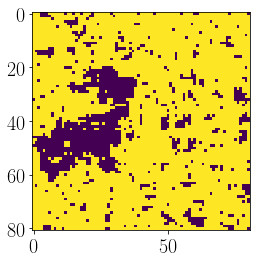

In [59]:
plt.imshow(correlated_data[0])

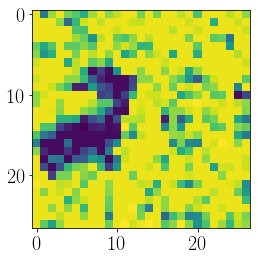

In [58]:
plt.imshow(coarse_grain_unfrozen_conv()[0, 0])

In [92]:
def mutual_info_coarse_grain(data):
    """
    data ~ coarse-grained data
    """
    data = np.round(data * 32)/32 # discretize data
    data = data.astype("float64")
    print(f"data: {data}")
    n_samples, n_rows, n_columns = data.shape
    print(n_samples, n_rows, n_columns)
    
    # compute counts
    p_xy = defaultdict(int)
    p_x = defaultdict(int)
    p_y = defaultdict(int)
    n_samples = 1000 # for testing, remove later
    for sample in range(n_samples):
#         if sample % 100 == 0:
#             print(sample, p_xy)
        for row in range(n_rows):
            for column in range(n_columns - 1):
                rectangle = data[sample, row, column:(column+2)]
                
                boundary_x = rectangle[0] #np.hstack((rectangle[0]))
                p_x[get_key(boundary_x)] += 1
                boundary_y = rectangle[1] #np.hstack((rectangle[1]))
                p_y[get_key(boundary_y)] += 1
                joint_boundary = np.hstack((boundary_x, boundary_y))
                
#                 return
                p_xy[get_key(joint_boundary)] += 1
    print(f"rectangle_{rectangle}, boundary_x: {boundary_x}, boundary_y: {boundary_y}, joint_boundary: {joint_boundary}")


    # Normalize counts
    p_xy = normalize_counts(p_xy)
    p_x = normalize_counts(p_x)
    p_y = normalize_counts(p_y)
    
#     print("p_xy", p_xy)
        
    
    # Generate all possible configurations of boundary conditions
#     n = 2
#     i = np.array(np.indices(n * (2,))).reshape(n, -1)
#     xy_keys = (i[:, np.argsort(i.sum(0)[::-1], kind='mergesort')].T[::-1].reshape(-1, n)*2-1)
#     xy_keys = xy_keys.astype("float64")
    n = np.arange(-1, 1, 1/32)
    xy = []
    for x in n:
        for y in n:
            xy.append(np.array([x, y]))
    xy_keys = np.array(xy).astype("float64")
    print(f"xy_keys: {xy_keys}")
#     xy_keys = np.array(xy_keys, dtype = float)

    # mi = <log (p(x, y)/p(x)p(y))>
    mi = 0
    no_config = []
    for xy in xy_keys:
#         print(xy)
        joint_prob = p_xy[get_key(xy)]
        x = xy[0]
        x_prob = p_x[get_key(x)]
        y = xy[1]
        y_prob = p_y[get_key(y)]
#         print(f"boundary_x:{x}")
        if joint_prob != 0:
            mi += np.log2(joint_prob/(x_prob * y_prob)) * joint_prob
        else:
            no_config.append(xy)
        
        
            
    return p_xy, p_x, p_y, mi, no_config

unfrozen = coarse_grain_unfrozen_conv(correlated_data).squeeze(1).numpy()
p_xy, p_x, p_y, mi, no_config = mutual_info_coarse_grain(unfrozen)
# print(f"p_xy: ")
# print(p_xy)
# print(f"p_x: {p_x}")
# print(f"p_y: {p_y}")
# print(f"mi: {mi}")

data: [[[ 0.53125 -0.0625   0.40625 ...  0.46875  0.53125  0.375  ]
  [ 0.53125  0.53125  0.53125 ...  0.53125  0.46875  0.53125]
  [ 0.53125  0.53125  0.53125 ...  0.53125  0.53125  0.46875]
  ...
  [ 0.53125  0.53125  0.375   ...  0.53125  0.53125  0.53125]
  [ 0.53125  0.53125  0.53125 ...  0.28125  0.46875  0.34375]
  [ 0.53125  0.28125  0.125   ...  0.21875  0.46875  0.375  ]]

 [[-0.21875 -0.3125  -0.21875 ... -0.375   -0.46875 -0.25   ]
  [-0.46875 -0.46875  0.28125 ...  0.0625  -0.09375  0.09375]
  [-0.46875 -0.46875  0.0625  ... -0.46875 -0.46875 -0.28125]
  ...
  [ 0.34375 -0.03125  0.34375 ...  0.0625  -0.40625 -0.40625]
  [ 0.46875  0.375    0.125   ...  0.03125 -0.46875 -0.0625 ]
  [-0.40625 -0.46875 -0.46875 ...  0.      -0.40625  0.21875]]

 [[ 0.53125  0.46875  0.53125 ...  0.4375   0.53125  0.53125]
  [ 0.53125  0.53125  0.53125 ...  0.53125  0.375    0.21875]
  [ 0.53125  0.25     0.53125 ...  0.53125  0.3125   0.34375]
  ...
  [-0.03125  0.53125  0.53125 ...  0.46875

In [93]:
mi

0.6176898114905365

In [98]:
frozen = coarse_grain_frozen_conv(correlated_data).squeeze(1)
p_xy, p_x, p_y, mi, no_config = mutual_info_coarse_grain(frozen.detach().numpy())
# print(f"p_xy: {p_xy}")
# print(f"p_x: {p_x}")
# print(f"p_y: {p_y}")
# print(f"mi: {mi}")

data: [[[ 0.75    -0.25     0.4375  ...  0.625    0.75     0.625  ]
  [ 0.75     0.75     0.75    ...  0.75     0.625    0.75   ]
  [ 0.75     0.75     0.75    ...  0.75     0.75     0.625  ]
  ...
  [ 0.75     0.75     0.625   ...  0.75     0.75     0.75   ]
  [ 0.75     0.75     0.75    ...  0.4375   0.625    0.625  ]
  [ 0.75     0.21875  0.21875 ... -0.03125  0.625    0.625  ]]

 [[-0.46875 -0.65625 -0.25    ... -0.46875 -0.78125 -0.46875]
  [-0.78125 -0.78125  0.4375  ...  0.21875 -0.03125 -0.03125]
  [-0.78125 -0.78125  0.21875 ... -0.78125 -0.78125 -0.65625]
  ...
  [ 0.625   -0.03125  0.625   ...  0.21875 -0.65625 -0.65625]
  [ 0.625    0.625    0.21875 ... -0.03125 -0.78125 -0.25   ]
  [-0.65625 -0.78125 -0.78125 ... -0.25    -0.65625  0.4375 ]]

 [[ 0.75     0.625    0.75    ...  0.4375   0.75     0.75   ]
  [ 0.75     0.75     0.75    ...  0.75     0.625    0.21875]
  [ 0.75     0.4375   0.75    ...  0.75     0.4375   0.625  ]
  ...
  [-0.03125  0.75     0.75    ...  0.625  

In [99]:
mi

0.6015958009691329

In [87]:
mi

0.6176898114905365

# Plot images

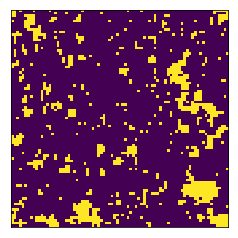

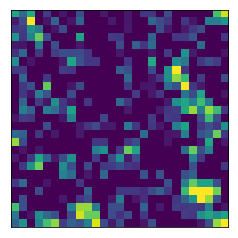

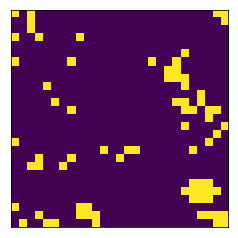

In [78]:
plt.imshow(correlated_data[0])
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(-unfrozen[0])
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(np.sign(-unfrozen[0]))
plt.xticks([])
plt.yticks([])
plt.show()

([], <a list of 0 Text yticklabel objects>)

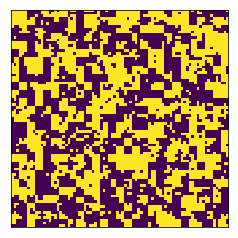

In [72]:
uncorrelated_data = np.load("../81x81/ising81x81_temp2.269_uncorrelated81x81.npy")
plt.imshow(uncorrelated_data[0])
plt.xticks([])
plt.yticks([])